# **Digit Recognition using KNN, CNN and LinearSVM**

## Imports

In [2]:
!pip install imutils
import time
import pandas as pd
import numpy as np
import math
import urllib
import cv2
import os
import pickle
import operator
import tarfile
import imutils
import matplotlib.pyplot as plt
from imutils import paths
from skimage import exposure
from skimage import feature
from random import seed, random, uniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import scipy.io as sio
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.utils import np_utils
import matplotlib.cm as cm
from sklearn.metrics import classification_report
from  sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.grid_search import GridSearchCV
from google.colab import files
import gzip as g
import csv
import random
import h5py
%matplotlib inline

  Running setup.py bdist_wheel for imutils ... - \ done
  Stored in directory: /content/.cache/pip/wheels/cb/58/9b/7debccbc53159611f67cc7e2e3ed37b217e56e9b40e7ba80c3
Successfully built imutils


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Downloading the datasets

In [0]:
# download files
SVHN_TRAIN_IMG_URL = 'http://ufldl.stanford.edu/housenumbers/train.tar.gz' 
SVHN_TEST_IMG_URL = 'http://ufldl.stanford.edu/housenumbers/test.tar.gz' 

SVHN_TRAIN_MAT_URL = 'http://ufldl.stanford.edu/housenumbers/train_32x32.mat' 
SVHN_TEST_MAT_URL = 'http://ufldl.stanford.edu/housenumbers/test_32x32.mat' 

SEMEION_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data'


MNIST_TRAIN_URL = 'https://pjreddie.com/media/files/mnist_train.csv'
MNIST_TEST_URL = 'https://pjreddie.com/media/files/mnist_test.csv'
MNIST_IMG_URL = 'https://github.com/myleott/mnist_png/raw/master/mnist_png.tar.gz'
EMNIST_MATLAB_URL = 'http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip'

USPS_DATA_URL = 'https://github.com/marionmari/Graph_stuff/raw/master/usps_digit_data/usps_resampled.mat'

def download_file(url, fname):
    urllib.request.urlretrieve(url, fname)



In [0]:
download_file(SVHN_TRAIN_IMG_URL, 'svhn_train_set')
download_file(SVHN_TEST_IMG_URL, 'svhn_test_set')

download_file(SVHN_TRAIN_MAT_URL, 'svhn_train_mat_set')
download_file(SVHN_TEST_MAT_URL, 'svhn_test_mat_set')

download_file(SEMEION_DATA_URL, 'semeion_data_set')


download_file(USPS_DATA_URL,'usps_dataset')
download_file(MNIST_IMG_URL, 'mnist_img_tar')
download_file(EMNIST_MATLAB_URL,'emnist_matlab_zip')


# CNN Implementation 

## Simple CNN on MNIST


In [8]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_for_predict = y_test

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# x_train = x_train.reshape((-1,1,28,28))
# plt.imshow(x_train[1][0],cmap = cm.binary)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=input_shape))
convout1 = Activation('relu')
model.add(convout1)
model.add(Conv2D(64, (3, 3), activation='relu'))
convout2 = MaxPooling2D(pool_size=(2, 2))
model.add(convout2)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 250s 4ms/step - loss: 0.2123 - acc: 0.9362 - val_loss: 0.0695 - val_acc: 0.9777
Epoch 2/12
14080/60000 [======>.......................] - ETA: 3:02 - loss: 0.0814 - acc: 0.9763

60000/60000 [==============================] - 251s 4ms/step - loss: 0.0762 - acc: 0.9772 - val_loss: 0.0362 - val_acc: 0.9879
Epoch 3/12
39808/60000 [==================>...........] - ETA: 1:20 - loss: 0.0588 - acc: 0.9822

60000/60000 [==============================] - 253s 4ms/step - loss: 0.0577 - acc: 0.9824 - val_loss: 0.0344 - val_acc: 0.9888
Epoch 4/12
49536/60000 [=======================>......] - ETA: 41s - loss: 0.0472 - acc: 0.9857

60000/60000 [==============================] - 251s 4ms/step - loss: 0.0466 - acc: 0.9858 - val_loss: 0.0300 - val_acc: 0.9905
Epoch 5/12
53248/60000 [=========================>....] - ETA: 26s - loss: 0.0368 - acc: 0.9883

60000/60000 [==============================] - 250s 4ms/step - loss: 0.0372 - acc: 0.9883 - val_loss: 0.0263 - val_acc: 0.9917
Epoch 6/12
54656/60000 [==========================>...] - ETA: 21s - loss: 0.0319 - acc: 0.9897

60000/60000 [==============================] - 251s 4ms/step - loss: 0.0323 - acc: 0.9897 - val_loss: 0.0295 - val_acc: 0.9916
Epoch 7/12
55168/60000 [==========================>...] - ETA: 19s - loss: 0.0292 - acc: 0.9911

60000/60000 [==============================] - 251s 4ms/step - loss: 0.0290 - acc: 0.9911 - val_loss: 0.0308 - val_acc: 0.9909
Epoch 8/12
55424/60000 [==========================>...] - ETA: 18s - loss: 0.0250 - acc: 0.9921

60000/60000 [==============================] - 251s 4ms/step - loss: 0.0248 - acc: 0.9922 - val_loss: 0.0295 - val_acc: 0.9916
Epoch 9/12
55552/60000 [==========================>...] - ETA: 17s - loss: 0.0239 - acc: 0.9923

60000/60000 [==============================] - 251s 4ms/step - loss: 0.0239 - acc: 0.9924 - val_loss: 0.0284 - val_acc: 0.9919
Epoch 10/12
55296/60000 [==========================>...] - ETA: 18s - loss: 0.0212 - acc: 0.9934

60000/60000 [==============================] - 251s 4ms/step - loss: 0.0210 - acc: 0.9934 - val_loss: 0.0283 - val_acc: 0.9915
Epoch 11/12
55168/60000 [==========================>...] - ETA: 19s - loss: 0.0196 - acc: 0.9936

60000/60000 [==============================] - 251s 4ms/step - loss: 0.0196 - acc: 0.9937 - val_loss: 0.0297 - val_acc: 0.9921
Epoch 12/12
55168/60000 [==========================>...] - ETA: 19s - loss: 0.0190 - acc: 0.9941

60000/60000 [==============================] - 251s 4ms/step - loss: 0.0193 - acc: 0.9941 - val_loss: 0.0240 - val_acc: 0.9941
Test loss: 0.02400889970966118
Test accuracy: 0.9941


10000/10000 [==============================] - 12s 1ms/step


             precision    recall  f1-score   support

    class 0      0.993     0.998     0.995       980
    class 1      0.996     0.998     0.997      1135
    class 2      0.993     0.994     0.994      1032
    class 3      0.994     0.993     0.994      1010
    class 4      0.996     0.996     0.996       982
    class 5      0.992     0.991     0.992       892
    class 6      0.996     0.991     0.993       958
    class 7      0.994     0.991     0.993      1028
    class 8      0.995     0.995     0.995       974
    class 9      0.992     0.993     0.993      1009

avg / total      0.994     0.994     0.994     10000

Shape of conv: (26, 26, 32)
Shape of conv: (12, 12, 64)


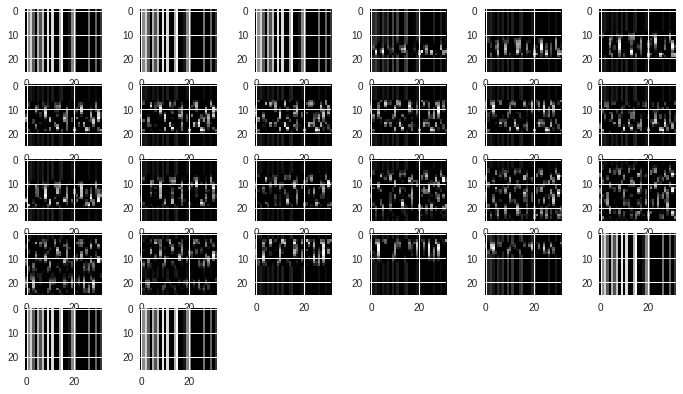

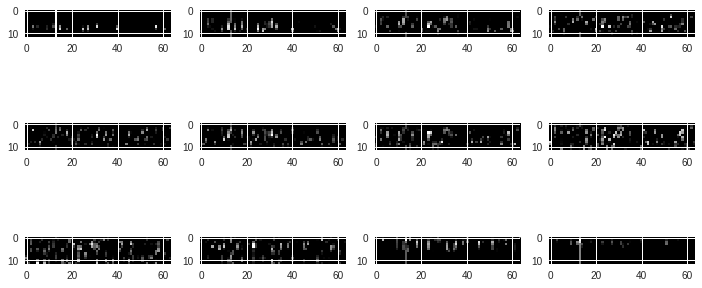

In [11]:
# evaluate model with sklearn
predictions_last_epoch = model.predict(x_test, batch_size=batch_size, verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)

print('\n')
print(classification_report(y_test, predicted_classes,target_names=
                            target_names,digits = 3))

# choose any image to want by specifying the index
img_to_visualize = x_train[5]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')
        

# Specify the layer to want to visualize
layer_to_visualize(convout1)

# As convout2 is the result of a MaxPool2D layer
# We can see that the image has blurred since
# the resolution has reduced 
layer_to_visualize(convout2)

## Grid Search on CNN using MNIST

In [7]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_for_predict = y_test

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# x_train = x_train.reshape((-1,1,28,28))
# plt.imshow(x_train[1][0],cmap = cm.binary)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

def make_model(dense_layer_sizes, kernel_size, pool_size):
    '''Creates model comprised of 2 convolutional layers followed by dense layers
    dense_layer_sizes: List of layer sizes.
        This list has one number for each layer
    kernel_size: Convolutional kernel size
    pool_size: Size of pooling area for max pooling
    '''

    model = Sequential()
    model.add(Conv2D(32, kernel_size=kernel_size,
                     padding='valid',
                     input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(64, kernel_size=kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(0.25))

    model.add(Flatten())
    for layer_size in dense_layer_sizes:
        model.add(Dense(layer_size))
        model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    return model

dense_size_candidates = [[64],[128]]
my_classifier = KerasClassifier(make_model, batch_size=32)
validator = GridSearchCV(my_classifier,
                         param_grid={'dense_layer_sizes': dense_size_candidates,
                                     # epochs is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': [5],
                                     'kernel_size': (3,3),
                                     'pool_size': (2,2)},
                         scoring='neg_log_loss',
                         n_jobs=1)
validator.fit(x_train, y_train)

print('The parameters of the best model are: ')
print(validator.best_params_)

# validator.best_estimator_ returns sklearn-wrapped version of best model.
# validator.best_estimator_.model returns the (unwrapped) keras model
best_model = validator.best_estimator_.model
metric_names = best_model.metrics_names
metric_values = best_model.evaluate(x_test, y_test)
for metric, value in zip(metric_names, metric_values):
    print(metric, ': ', value)


Epoch 1/5
40000/40000 [==============================] - 115s 3ms/step - loss: 0.3256 - acc: 0.9009


Epoch 2/5
40000/40000 [==============================] - 115s 3ms/step - loss: 0.1304 - acc: 0.9616


Epoch 3/5
40000/40000 [==============================] - 116s 3ms/step - loss: 0.1008 - acc: 0.9717


Epoch 4/5
40000/40000 [==============================] - 116s 3ms/step - loss: 0.0917 - acc: 0.9736


Epoch 5/5
40000/40000 [==============================] - 116s 3ms/step - loss: 0.0834 - acc: 0.9760


Epoch 1/5
40000/40000 [==============================] - 117s 3ms/step - loss: 0.2992 - acc: 0.9100


Epoch 2/5
35968/40000 [=========================>....] - ETA: 13s - loss: 0.1306 - acc: 0.9637

40000/40000 [==============================] - 136s 3ms/step - loss: 0.1281 - acc: 0.9645
Epoch 3/5
15328/40000 [==========>...................] - ETA: 1:17 - loss: 0.1085 - acc: 0.9693

40000/40000 [==============================] - 122s 3ms/step - loss: 0.0988 - acc: 0.9720
Epoch 4/5
 6016/40000 [===>..........................] - ETA: 1:38 - loss: 0.0828 - acc: 0.9776

40000/40000 [==============================] - 120s 3ms/step - loss: 0.0866 - acc: 0.9756
Epoch 5/5
 1728/40000 [>.............................] - ETA: 1:51 - loss: 0.0722 - acc: 0.9792

40000/40000 [==============================] - 116s 3ms/step - loss: 0.0842 - acc: 0.9770
Epoch 1/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.3182 - acc: 0.9026
Epoch 2/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.1233 - acc: 0.9647
Epoch 3/5


40000/40000 [==============================] - 116s 3ms/step - loss: 0.0998 - acc: 0.9719
Epoch 4/5


40000/40000 [==============================] - 116s 3ms/step - loss: 0.0825 - acc: 0.9765
Epoch 5/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.0762 - acc: 0.9781
Epoch 1/5


40000/40000 [==============================] - 116s 3ms/step - loss: 0.2991 - acc: 0.9087
Epoch 2/5


40000/40000 [==============================] - 116s 3ms/step - loss: 0.1220 - acc: 0.9644
Epoch 3/5


40000/40000 [==============================] - 116s 3ms/step - loss: 0.0957 - acc: 0.9720
Epoch 4/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.0892 - acc: 0.9739
Epoch 5/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.0855 - acc: 0.9759
Epoch 1/5


39456/40000 [============================>.] - ETA: 1s - loss: 0.3026 - acc: 0.9096

40000/40000 [==============================] - 117s 3ms/step - loss: 0.3002 - acc: 0.9104
Epoch 2/5
16928/40000 [===========>..................] - ETA: 1:06 - loss: 0.1359 - acc: 0.9602

40000/40000 [==============================] - 112s 3ms/step - loss: 0.1255 - acc: 0.9634
Epoch 3/5
 6784/40000 [====>.........................] - ETA: 1:32 - loss: 0.0996 - acc: 0.9736

40000/40000 [==============================] - 111s 3ms/step - loss: 0.0981 - acc: 0.9733
Epoch 4/5
 2112/40000 [>.............................] - ETA: 1:45 - loss: 0.0729 - acc: 0.9792

40000/40000 [==============================] - 111s 3ms/step - loss: 0.0817 - acc: 0.9770
Epoch 5/5


40000/40000 [==============================] - 111s 3ms/step - loss: 0.0746 - acc: 0.9795
Epoch 1/5


40000/40000 [==============================] - 112s 3ms/step - loss: 0.3097 - acc: 0.9051
Epoch 2/5


40000/40000 [==============================] - 112s 3ms/step - loss: 0.1253 - acc: 0.9642
Epoch 3/5


39520/40000 [============================>.] - ETA: 1s - loss: 0.0997 - acc: 0.9722

40000/40000 [==============================] - 116s 3ms/step - loss: 0.1001 - acc: 0.9721
Epoch 4/5
17024/40000 [===========>..................] - ETA: 1:06 - loss: 0.0855 - acc: 0.9760

40000/40000 [==============================] - 116s 3ms/step - loss: 0.0829 - acc: 0.9759
Epoch 5/5
 6752/40000 [====>.........................] - ETA: 1:36 - loss: 0.0738 - acc: 0.9788

40000/40000 [==============================] - 115s 3ms/step - loss: 0.0778 - acc: 0.9779
Epoch 1/5
 2080/40000 [>.............................] - ETA: 1:56 - loss: 1.2723 - acc: 0.5635

40000/40000 [==============================] - 116s 3ms/step - loss: 0.2926 - acc: 0.9102
Epoch 2/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.1221 - acc: 0.9649
Epoch 3/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.0980 - acc: 0.9719
Epoch 4/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.0837 - acc: 0.9758
Epoch 5/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.0816 - acc: 0.9767
Epoch 1/5


40000/40000 [==============================] - 118s 3ms/step - loss: 0.3286 - acc: 0.9019
Epoch 2/5


40000/40000 [==============================] - 116s 3ms/step - loss: 0.1325 - acc: 0.9625
Epoch 3/5


38400/40000 [===========================>..] - ETA: 4s - loss: 0.1025 - acc: 0.9705

40000/40000 [==============================] - 117s 3ms/step - loss: 0.1020 - acc: 0.9706
Epoch 4/5
16480/40000 [===========>..................] - ETA: 1:08 - loss: 0.0946 - acc: 0.9728

40000/40000 [==============================] - 116s 3ms/step - loss: 0.0904 - acc: 0.9741
Epoch 5/5
 6560/40000 [===>..........................] - ETA: 1:36 - loss: 0.0750 - acc: 0.9767

40000/40000 [==============================] - 117s 3ms/step - loss: 0.0827 - acc: 0.9762
Epoch 1/5
 2016/40000 [>.............................] - ETA: 1:59 - loss: 1.3437 - acc: 0.5481

40000/40000 [==============================] - 117s 3ms/step - loss: 0.3017 - acc: 0.9073
Epoch 2/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.1263 - acc: 0.9642
Epoch 3/5


40000/40000 [==============================] - 116s 3ms/step - loss: 0.0974 - acc: 0.9725
Epoch 4/5


40000/40000 [==============================] - 116s 3ms/step - loss: 0.0825 - acc: 0.9761
Epoch 5/5


40000/40000 [==============================] - 116s 3ms/step - loss: 0.0791 - acc: 0.9773
Epoch 1/5


40000/40000 [==============================] - 113s 3ms/step - loss: 0.2973 - acc: 0.9098
Epoch 2/5


40000/40000 [==============================] - 112s 3ms/step - loss: 0.1214 - acc: 0.9647
Epoch 3/5


40000/40000 [==============================] - 113s 3ms/step - loss: 0.0967 - acc: 0.9724
Epoch 4/5


40000/40000 [==============================] - 115s 3ms/step - loss: 0.0899 - acc: 0.9748
Epoch 5/5


40000/40000 [==============================] - 130s 3ms/step - loss: 0.0823 - acc: 0.9766
Epoch 1/5


38400/40000 [===========================>..] - ETA: 4s - loss: 0.3069 - acc: 0.9064

40000/40000 [==============================] - 117s 3ms/step - loss: 0.3006 - acc: 0.9086
Epoch 2/5
16512/40000 [===========>..................] - ETA: 1:08 - loss: 0.1365 - acc: 0.9603

40000/40000 [==============================] - 117s 3ms/step - loss: 0.1246 - acc: 0.9639
Epoch 3/5
 6528/40000 [===>..........................] - ETA: 1:37 - loss: 0.1023 - acc: 0.9689

40000/40000 [==============================] - 116s 3ms/step - loss: 0.0974 - acc: 0.9715
Epoch 4/5
 1984/40000 [>.............................] - ETA: 1:51 - loss: 0.0834 - acc: 0.9743

40000/40000 [==============================] - 113s 3ms/step - loss: 0.0889 - acc: 0.9756
Epoch 5/5


40000/40000 [==============================] - 112s 3ms/step - loss: 0.0799 - acc: 0.9773
Epoch 1/5


40000/40000 [==============================] - 113s 3ms/step - loss: 0.3050 - acc: 0.9060
Epoch 2/5


40000/40000 [==============================] - 116s 3ms/step - loss: 0.1313 - acc: 0.9634
Epoch 3/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.1030 - acc: 0.9703
Epoch 4/5


40000/40000 [==============================] - 117s 3ms/step - loss: 0.0879 - acc: 0.9753
Epoch 5/5


40000/40000 [==============================] - 116s 3ms/step - loss: 0.0888 - acc: 0.9749
Epoch 1/5


40000/40000 [==============================] - 135s 3ms/step - loss: 0.2304 - acc: 0.9311
Epoch 2/5


40000/40000 [==============================] - 129s 3ms/step - loss: 0.0940 - acc: 0.9729
Epoch 3/5


38240/40000 [===========================>..] - ETA: 5s - loss: 0.0702 - acc: 0.9796

40000/40000 [==============================] - 129s 3ms/step - loss: 0.0706 - acc: 0.9796
Epoch 4/5
16064/40000 [===========>..................] - ETA: 1:17 - loss: 0.0567 - acc: 0.9835

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0581 - acc: 0.9831
Epoch 5/5
 6048/40000 [===>..........................] - ETA: 1:50 - loss: 0.0521 - acc: 0.9841

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0542 - acc: 0.9837
Epoch 1/5
 1472/40000 [>.............................] - ETA: 2:25 - loss: 1.4128 - acc: 0.5183

40000/40000 [==============================] - 131s 3ms/step - loss: 0.2412 - acc: 0.9258
Epoch 2/5


36928/40000 [==========================>...] - ETA: 9s - loss: 0.0958 - acc: 0.9719 

40000/40000 [==============================] - 129s 3ms/step - loss: 0.0937 - acc: 0.9726
Epoch 3/5
15520/40000 [==========>...................] - ETA: 1:19 - loss: 0.0653 - acc: 0.9803

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0691 - acc: 0.9796
Epoch 4/5
 5856/40000 [===>..........................] - ETA: 1:51 - loss: 0.0473 - acc: 0.9853

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0559 - acc: 0.9832
Epoch 5/5
 1376/40000 [>.............................] - ETA: 2:04 - loss: 0.0384 - acc: 0.9891

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0502 - acc: 0.9854
Epoch 1/5


37664/40000 [===========================>..] - ETA: 7s - loss: 0.2355 - acc: 0.9282

40000/40000 [==============================] - 131s 3ms/step - loss: 0.2271 - acc: 0.9307
Epoch 2/5
15456/40000 [==========>...................] - ETA: 1:19 - loss: 0.0952 - acc: 0.9720

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0883 - acc: 0.9738
Epoch 3/5
 5664/40000 [===>..........................] - ETA: 1:50 - loss: 0.0629 - acc: 0.9797

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0652 - acc: 0.9799
Epoch 4/5
  928/40000 [..............................] - ETA: 2:06 - loss: 0.0494 - acc: 0.9784

38784/40000 [============================>.] - ETA: 3s - loss: 0.0542 - acc: 0.9838

40000/40000 [==============================] - 129s 3ms/step - loss: 0.0539 - acc: 0.9839
Epoch 5/5
15200/40000 [==========>...................] - ETA: 1:18 - loss: 0.0498 - acc: 0.9855

40000/40000 [==============================] - 126s 3ms/step - loss: 0.0489 - acc: 0.9858
Epoch 1/5
 5088/40000 [==>...........................] - ETA: 1:56 - loss: 0.6964 - acc: 0.7763

39424/40000 [============================>.] - ETA: 1s - loss: 0.2282 - acc: 0.9308

40000/40000 [==============================] - 127s 3ms/step - loss: 0.2258 - acc: 0.9316
Epoch 2/5
16000/40000 [===========>..................] - ETA: 1:16 - loss: 0.0904 - acc: 0.9724

40000/40000 [==============================] - 129s 3ms/step - loss: 0.0865 - acc: 0.9744
Epoch 3/5
 5984/40000 [===>..........................] - ETA: 1:50 - loss: 0.0676 - acc: 0.9816

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0667 - acc: 0.9808
Epoch 4/5
 1504/40000 [>.............................] - ETA: 2:05 - loss: 0.0549 - acc: 0.9827

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0581 - acc: 0.9830
Epoch 5/5


39712/40000 [============================>.] - ETA: 0s - loss: 0.0520 - acc: 0.9850

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0519 - acc: 0.9850
Epoch 1/5
16864/40000 [===========>..................] - ETA: 1:16 - loss: 0.3369 - acc: 0.8959

40000/40000 [==============================] - 132s 3ms/step - loss: 0.2189 - acc: 0.9332
Epoch 2/5
 6528/40000 [===>..........................] - ETA: 1:49 - loss: 0.0976 - acc: 0.9709

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0867 - acc: 0.9748
Epoch 3/5
 1760/40000 [>.............................] - ETA: 2:04 - loss: 0.0689 - acc: 0.9818

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0649 - acc: 0.9805
Epoch 4/5


39264/40000 [============================>.] - ETA: 2s - loss: 0.0576 - acc: 0.9826

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0571 - acc: 0.9827
Epoch 5/5
16672/40000 [===========>..................] - ETA: 1:16 - loss: 0.0450 - acc: 0.9860

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0483 - acc: 0.9855
Epoch 1/5
 6624/40000 [===>..........................] - ETA: 1:54 - loss: 0.6257 - acc: 0.8065

40000/40000 [==============================] - 132s 3ms/step - loss: 0.2363 - acc: 0.9283
Epoch 2/5
 1856/40000 [>.............................] - ETA: 2:04 - loss: 0.0899 - acc: 0.9704

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0887 - acc: 0.9728
Epoch 3/5


40000/40000 [==============================] - 131s 3ms/step - loss: 0.0640 - acc: 0.9812
Epoch 4/5


38208/40000 [===========================>..] - ETA: 5s - loss: 0.0571 - acc: 0.9834

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0568 - acc: 0.9835
Epoch 5/5
16352/40000 [===========>..................] - ETA: 1:17 - loss: 0.0494 - acc: 0.9851

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0493 - acc: 0.9858
Epoch 1/5
 6272/40000 [===>..........................] - ETA: 1:56 - loss: 0.6029 - acc: 0.8048

40000/40000 [==============================] - 132s 3ms/step - loss: 0.2283 - acc: 0.9299
Epoch 2/5
 1664/40000 [>.............................] - ETA: 2:05 - loss: 0.1144 - acc: 0.9627

39072/40000 [============================>.] - ETA: 3s - loss: 0.0909 - acc: 0.9730

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0912 - acc: 0.9730
Epoch 3/5
16576/40000 [===========>..................] - ETA: 1:16 - loss: 0.0692 - acc: 0.9801

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0688 - acc: 0.9795
Epoch 4/5
 6080/40000 [===>..........................] - ETA: 1:50 - loss: 0.0535 - acc: 0.9832

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0593 - acc: 0.9824
Epoch 5/5
 1536/40000 [>.............................] - ETA: 2:06 - loss: 0.0370 - acc: 0.9889

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0509 - acc: 0.9848
Epoch 1/5


39584/40000 [============================>.] - ETA: 1s - loss: 0.2211 - acc: 0.9339

40000/40000 [==============================] - 132s 3ms/step - loss: 0.2201 - acc: 0.9342
Epoch 2/5
16800/40000 [===========>..................] - ETA: 1:16 - loss: 0.0940 - acc: 0.9725

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0891 - acc: 0.9742
Epoch 3/5
 6688/40000 [====>.........................] - ETA: 1:49 - loss: 0.0753 - acc: 0.9789

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0676 - acc: 0.9794
Epoch 4/5
 1888/40000 [>.............................] - ETA: 2:04 - loss: 0.0672 - acc: 0.9815

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0562 - acc: 0.9835
Epoch 5/5


37984/40000 [===========================>..] - ETA: 6s - loss: 0.0492 - acc: 0.9854

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0496 - acc: 0.9853
Epoch 1/5
16224/40000 [===========>..................] - ETA: 1:19 - loss: 0.3822 - acc: 0.8812

40000/40000 [==============================] - 132s 3ms/step - loss: 0.2399 - acc: 0.9272
Epoch 2/5
 6144/40000 [===>..........................] - ETA: 1:51 - loss: 0.0904 - acc: 0.9735

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0885 - acc: 0.9741
Epoch 3/5
 1600/40000 [>.............................] - ETA: 2:06 - loss: 0.0597 - acc: 0.9825

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0676 - acc: 0.9804
Epoch 4/5


40000/40000 [==============================] - 131s 3ms/step - loss: 0.0581 - acc: 0.9825
Epoch 5/5


40000/40000 [==============================] - 131s 3ms/step - loss: 0.0500 - acc: 0.9851
Epoch 1/5


40000/40000 [==============================] - 132s 3ms/step - loss: 0.2340 - acc: 0.9278
Epoch 2/5


36160/40000 [==========================>...] - ETA: 12s - loss: 0.0944 - acc: 0.9726

40000/40000 [==============================] - 130s 3ms/step - loss: 0.0937 - acc: 0.9727
Epoch 3/5
14336/40000 [=========>....................] - ETA: 1:22 - loss: 0.0655 - acc: 0.9801

40000/40000 [==============================] - 129s 3ms/step - loss: 0.0685 - acc: 0.9798
Epoch 4/5
 5056/40000 [==>...........................] - ETA: 1:54 - loss: 0.0626 - acc: 0.9828

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0574 - acc: 0.9834
Epoch 5/5
 1152/40000 [..............................] - ETA: 2:08 - loss: 0.0483 - acc: 0.9852

40000/40000 [==============================] - 131s 3ms/step - loss: 0.0494 - acc: 0.9849
Epoch 1/5


35328/40000 [=========================>....] - ETA: 15s - loss: 0.2421 - acc: 0.9275

40000/40000 [==============================] - 128s 3ms/step - loss: 0.2287 - acc: 0.9313
Epoch 2/5
13568/40000 [=========>....................] - ETA: 1:22 - loss: 0.0962 - acc: 0.9721

40000/40000 [==============================] - 125s 3ms/step - loss: 0.0886 - acc: 0.9737
Epoch 3/5
 2944/40000 [=>............................] - ETA: 1:55 - loss: 0.0751 - acc: 0.9783

36736/40000 [==========================>...] - ETA: 10s - loss: 0.0683 - acc: 0.9790

40000/40000 [==============================] - 124s 3ms/step - loss: 0.0683 - acc: 0.9791
Epoch 4/5
14048/40000 [=========>....................] - ETA: 1:20 - loss: 0.0591 - acc: 0.9820

40000/40000 [==============================] - 125s 3ms/step - loss: 0.0565 - acc: 0.9826
Epoch 5/5
 3232/40000 [=>............................] - ETA: 1:54 - loss: 0.0463 - acc: 0.9855

36992/40000 [==========================>...] - ETA: 9s - loss: 0.0495 - acc: 0.9851

40000/40000 [==============================] - 125s 3ms/step - loss: 0.0487 - acc: 0.9852
Epoch 1/5
14624/40000 [=========>....................] - ETA: 1:20 - loss: 0.3966 - acc: 0.8783

40000/40000 [==============================] - 125s 3ms/step - loss: 0.2364 - acc: 0.9283
Epoch 2/5
 4256/40000 [==>...........................] - ETA: 1:51 - loss: 0.1076 - acc: 0.9669

38848/40000 [============================>.] - ETA: 3s - loss: 0.0898 - acc: 0.9733

40000/40000 [==============================] - 124s 3ms/step - loss: 0.0895 - acc: 0.9734
Epoch 3/5
15296/40000 [==========>...................] - ETA: 1:16 - loss: 0.0738 - acc: 0.9788

40000/40000 [==============================] - 124s 3ms/step - loss: 0.0698 - acc: 0.9788
Epoch 4/5
 4160/40000 [==>...........................] - ETA: 1:50 - loss: 0.0541 - acc: 0.9839

36736/40000 [==========================>...] - ETA: 10s - loss: 0.0565 - acc: 0.9834

40000/40000 [==============================] - 125s 3ms/step - loss: 0.0560 - acc: 0.9834
Epoch 5/5
15104/40000 [==========>...................] - ETA: 1:20 - loss: 0.0500 - acc: 0.9844

40000/40000 [==============================] - 129s 3ms/step - loss: 0.0497 - acc: 0.9849
Epoch 1/5


53216/60000 [=========================>....] - ETA: 22s - loss: 0.1941 - acc: 0.9411

60000/60000 [==============================] - 197s 3ms/step - loss: 0.1815 - acc: 0.9449
Epoch 2/5
14080/60000 [======>.......................] - ETA: 2:29 - loss: 0.0858 - acc: 0.9749

59520/60000 [============================>.] - ETA: 1s - loss: 0.0758 - acc: 0.9781

60000/60000 [==============================] - 196s 3ms/step - loss: 0.0756 - acc: 0.9781
Epoch 3/5
17024/60000 [=======>......................] - ETA: 2:20 - loss: 0.0566 - acc: 0.9824

54688/60000 [==========================>...] - ETA: 17s - loss: 0.0598 - acc: 0.9817

60000/60000 [==============================] - 196s 3ms/step - loss: 0.0593 - acc: 0.9819
Epoch 4/5
14784/60000 [======>.......................] - ETA: 2:27 - loss: 0.0526 - acc: 0.9844

60000/60000 [==============================] - 197s 3ms/step - loss: 0.0522 - acc: 0.9847
Epoch 5/5


40864/60000 [===================>..........] - ETA: 1:03 - loss: 0.0486 - acc: 0.9855

60000/60000 [==============================] - 198s 3ms/step - loss: 0.0477 - acc: 0.9858
The parameters of the best model are: 
{'dense_layer_sizes': [128], 'epochs': 5, 'kernel_size': 3, 'pool_size': 2}
10000/10000 [==============================] - 9s 898us/step
loss :  0.035501926534925864
acc :  0.989


In [9]:
best_model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))
score = best_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# evaluate model with sklearn
predictions_last_epoch = best_model.predict(x_test, batch_size=128, 
                                            verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)
print('\n')
print(classification_report(y_test, predicted_classes,target_names=target_names,
                            digits = 3))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0372 - acc: 0.9887 - val_loss: 0.0315 - val_acc: 0.9898
Epoch 2/12
14080/60000 [======>.......................] - ETA: 1:58 - loss: 0.0359 - acc: 0.9888

60000/60000 [==============================] - 162s 3ms/step - loss: 0.0340 - acc: 0.9899 - val_loss: 0.0282 - val_acc: 0.9916
Epoch 3/12
39808/60000 [==================>...........] - ETA: 52s - loss: 0.0323 - acc: 0.9903

60000/60000 [==============================] - 162s 3ms/step - loss: 0.0320 - acc: 0.9907 - val_loss: 0.0294 - val_acc: 0.9910
Epoch 4/12
49664/60000 [=======================>......] - ETA: 26s - loss: 0.0294 - acc: 0.9910

60000/60000 [==============================] - 163s 3ms/step - loss: 0.0290 - acc: 0.9911 - val_loss: 0.0273 - val_acc: 0.9911
Epoch 5/12
53376/60000 [=========================>....] - ETA: 17s - loss: 0.0254 - acc: 0.9923

60000/60000 [==============================] - 163s 3ms/step - loss: 0.0253 - acc: 0.9924 - val_loss: 0.0267 - val_acc: 0.9920
Epoch 6/12
54784/60000 [==========================>...] - ETA: 13s - loss: 0.0250 - acc: 0.9924

60000/60000 [==============================] - 161s 3ms/step - loss: 0.0253 - acc: 0.9925 - val_loss: 0.0304 - val_acc: 0.9909
Epoch 7/12
55296/60000 [==========================>...] - ETA: 12s - loss: 0.0228 - acc: 0.9927

60000/60000 [==============================] - 161s 3ms/step - loss: 0.0232 - acc: 0.9927 - val_loss: 0.0269 - val_acc: 0.9917
Epoch 8/12
55552/60000 [==========================>...] - ETA: 11s - loss: 0.0237 - acc: 0.9931

60000/60000 [==============================] - 161s 3ms/step - loss: 0.0235 - acc: 0.9931 - val_loss: 0.0279 - val_acc: 0.9923
Epoch 9/12
55552/60000 [==========================>...] - ETA: 11s - loss: 0.0212 - acc: 0.9938

60000/60000 [==============================] - 161s 3ms/step - loss: 0.0207 - acc: 0.9939 - val_loss: 0.0267 - val_acc: 0.9923
Epoch 10/12
55296/60000 [==========================>...] - ETA: 12s - loss: 0.0192 - acc: 0.9943

60000/60000 [==============================] - 161s 3ms/step - loss: 0.0196 - acc: 0.9941 - val_loss: 0.0279 - val_acc: 0.9923
Epoch 11/12
55296/60000 [==========================>...] - ETA: 12s - loss: 0.0196 - acc: 0.9939

60000/60000 [==============================] - 161s 3ms/step - loss: 0.0194 - acc: 0.9939 - val_loss: 0.0285 - val_acc: 0.9926
Epoch 12/12
55296/60000 [==========================>...] - ETA: 12s - loss: 0.0183 - acc: 0.9940

60000/60000 [==============================] - 161s 3ms/step - loss: 0.0185 - acc: 0.9939 - val_loss: 0.0283 - val_acc: 0.9926
Test loss: 0.028291947927607954
Test accuracy: 0.9926
10000/10000 [==============================] - 8s 755us/step


             precision    recall  f1-score   support

    class 0      0.988     0.999     0.993       980
    class 1      0.997     0.998     0.998      1135
    class 2      0.993     0.992     0.993      1032
    class 3      0.993     0.994     0.994      1010
    class 4      0.995     0.993     0.994       982
    class 5      0.991     0.989     0.990       892
    class 6      0.994     0.989     0.991       958
    class 7      0.987     0.995     0.991      1028
    class 8      0.995     0.989     0.992       974
    class 9      0.992     0.987     0.990      1009

avg / total      0.993     0.993     0.993     10000



## simple CNN on Semeion

In [0]:
def one_hot_decoder(a):
  return np.argmax(a)

In [0]:
train_class = []
train_features=[]
with open('semeion_data_set', 'rt') as file:
  dataset = file.readlines()
  

for row in dataset:
  data = row.split()
  X = np.array(data[:256]).astype(np.float).tolist()
  y = np.array(data[256:]).astype(np.int).tolist()
  y = one_hot_decoder(y)
  train_features.append(X)
  train_class.append(y)


x_train, x_test, y_train, y_test = train_test_split(np.asarray(train_features),
                                                    np.asarray(train_class))
print(x_train.shape," ",x_test.shape," ",y_train.shape," ",y_test.shape)


(1194, 256)   (399, 256)   (1194,)   (399,)


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 16, 16

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= x_train.max()
x_test /= x_test.max()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (1194, 16, 16, 1)
1194 train samples
399 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1194 samples, validate on 399 samples
Epoch 1/12
1194/1194 [==============================] - 4s 3ms/step - loss: 2.0797 - acc: 0.2471 - val_loss: 1.4924 - val_acc: 0.5188
Epoch 2/12
1194/1194 [==============================] - 2s 2ms/step - loss: 1.5298 - acc: 0.4765 - val_loss: 1.0340 - val_acc: 0.6591
Epoch 3/12
1194/1194 [==============================] - 2s 2ms/step - loss: 0.9866 - acc: 0.6608 - val_loss: 0.7138 - val_acc: 0.7769
Epoch 4/12
1194/1194 [==============================] - 2s 2ms/step - loss: 0.7465 - acc: 0.7529 - val_loss: 0.5231 - val_acc: 0.8371
Epoch 5/12
1194/1194 [==============================] - 2s 2ms/step - loss: 0.6055 - acc: 0.8082 - val_loss: 0.5003 - val_acc: 0.8396
Epoch 6/12
1194/1194 [==============================] - 2s 2ms/step - loss: 0.4629 - acc: 0.8509 - val_loss: 0.2890 - val_acc: 0.9098
Epoch 7/12
1194/1194 [==============================] - 2s 2ms/step - loss: 0.3776 - acc: 0.8735 - val_loss: 0.4270 - val_acc: 0.8346
Epoch 8/12
1194

1194/1194 [==============================] - 2s 2ms/step - loss: 0.1859 - acc: 0.9456 - val_loss: 0.1948 - val_acc: 0.9273
Test loss: 0.1948286035007104
Test accuracy: 0.9273182960381186


In [0]:

# evaluate model with sklearn
predictions_last_epoch = model.predict(x_test, batch_size=batch_size, verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)

print('\n')
print(classification_report(y_test, predicted_classes,target_names=
                            target_names,digits = 3))

399/399 [==============================] - 0s 1ms/step


             precision    recall  f1-score   support

    class 0      0.977     0.977     0.977        43
    class 1      0.868     0.971     0.917        34
    class 2      0.975     0.951     0.963        41
    class 3      0.897     0.946     0.921        37
    class 4      0.826     0.974     0.894        39
    class 5      0.976     0.953     0.965        43
    class 6      1.000     0.889     0.941        45
    class 7      1.000     0.881     0.937        42
    class 8      0.833     0.938     0.882        32
    class 9      0.921     0.814     0.864        43

avg / total      0.933     0.927     0.928       399



## CNN with the best params run on Semeion dataset


In [0]:
train_class = []
train_features=[]
with open('semeion_data_set', 'rt') as file:
  dataset = file.readlines()
  

for row in dataset:
  data = row.split()
  X = np.array(data[:256]).astype(np.float).tolist()
  y = np.array(data[256:]).astype(np.int).tolist()
  y = one_hot_decoder(y)
  train_features.append(X)
  train_class.append(y)


x_train, x_test, y_train, y_test = train_test_split(np.asarray(train_features),
                                                    np.asarray(train_class))
print(x_train.shape," ",x_test.shape," ",y_train.shape," ",y_test.shape)

(1194, 256)   (399, 256)   (1194,)   (399,)


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 16, 16

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= x_train.max()
x_test /= x_test.max()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (1194, 16, 16, 1)
1194 train samples
399 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 padding='valid',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 1194 samples, validate on 399 samples
Epoch 1/12
1194/1194 [==============================] - 1s 977us/step - loss: 2.1217 - acc: 0.2496 - val_loss: 1.4833 - val_acc: 0.5388
Epoch 2/12
1194/1194 [==============================] - 1s 533us/step - loss: 1.4906 - acc: 0.5034 - val_loss: 0.8514 - val_acc: 0.7619
Epoch 3/12
1194/1194 [==============================] - 1s 687us/step - loss: 0.9487 - acc: 0.6893 - val_loss: 0.6747 - val_acc: 0.7669
Epoch 4/12
1194/1194 [==============================] - 1s 814us/step - loss: 0.6646 - acc: 0.7814 - val_loss: 0.5966 - val_acc: 0.7970
Epoch 5/12
1194/1194 [==============================] - 1s 824us/step - loss: 0.5135 - acc: 0.8409 - val_loss: 0.4703 - val_acc: 0.8471
Epoch 6/12
1194/1194 [==============================] - 1s 816us/step - loss: 0.4117 - acc: 0.8635 - val_loss: 0.3551 - val_acc: 0.8947
Epoch 7/12
1194/1194 [==============================] - 1s 829us/step - loss: 0.3134 - acc: 0.9054 - val_loss: 0.2960 - val_acc: 0.9048
E

Epoch 12/12
1194/1194 [==============================] - 1s 825us/step - loss: 0.1519 - acc: 0.9539 - val_loss: 0.1748 - val_acc: 0.9449
Test loss: 0.17484501385150997
Test accuracy: 0.9448621555378562


In [0]:
# evaluate model with sklearn
predictions_last_epoch = model.predict(x_test, batch_size=batch_size, verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)

print('\n')
print(classification_report(y_test, predicted_classes,target_names=
                            target_names,digits = 3))

399/399 [==============================] - 0s 528us/step


             precision    recall  f1-score   support

    class 0      0.973     0.973     0.973        37
    class 1      0.860     1.000     0.925        37
    class 2      0.976     0.976     0.976        41
    class 3      0.977     0.933     0.955        45
    class 4      0.927     0.905     0.916        42
    class 5      0.967     0.967     0.967        30
    class 6      0.949     0.949     0.949        39
    class 7      0.976     0.976     0.976        41
    class 8      0.911     0.911     0.911        45
    class 9      0.949     0.881     0.914        42

avg / total      0.946     0.945     0.945       399



## Simple CNN on SVHN

In [0]:
train_set_mat = sio.loadmat('svhn_train_mat_set')
test_set_mat = sio.loadmat('svhn_test_mat_set')
# extra_set_mat=sio.load('svhn_extra_mat_set')
X_train=[[] for i in range(73257)] 
Y_train=[[] for i in range(73257)]
X_test=[[] for i in range(26032)]
Y_test=[[] for i in range(26032)]
# X_extra=[[] for i in range(531131)]
# Y_extra=[[] for i in range(531131)]

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  
for image_index in range(73257):
  for i in range(32):
    for j in range(32):
      X_train[image_index].append(rgb2gray(train_set_mat['X'][:,:,:,image_index][i][j]))
      Y_train[image_index]=train_set_mat['y'][image_index][0]



for image_index in range(26032):
  for i in range(32):
    for j in range(32):
      X_test[image_index].append(rgb2gray(test_set_mat['X'][:,:,:,image_index][i][j]))
      Y_test[image_index]=test_set_mat['y'][image_index][0]
      

print("X_train" ,len(X_train)," ",len(X_train[0]))
print("Y_train" ,len(Y_train)," ",Y_train[0])
print("X_test" ,len(X_test)," ",len(X_test[0]))
print("Y_test" ,len(Y_test)," ",Y_test[0])

X_train 73257   1024
Y_train 73257   1
X_test 26032   1024
Y_test 26032   5


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= X_train.max()
X_test /= X_train.max()
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


x_train shape: (73257, 32, 32, 1)
73257 train samples
26032 test samples


In [0]:
for index,row in enumerate(Y_train):
  if row == 10:
    Y_train[index] = 0
for index,row in enumerate(Y_test):
  if row == 10:
    Y_test[index] = 0
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train on 73257 samples, validate on 26032 samples
Epoch 1/30
73257/73257 [==============================] - 18s 250us/step - loss: 1.4430 - acc: 0.5185 - val_loss: 3.6386 - val_acc: 0.7699
Epoch 2/30
52608/73257 [====================>.........] - ETA: 4s - loss: 0.7039 - acc: 0.7885

73257/73257 [==============================] - 18s 245us/step - loss: 0.6746 - acc: 0.7974 - val_loss: 2.5213 - val_acc: 0.8403
Epoch 3/30
73257/73257 [==============================] - 18s 242us/step - loss: 0.5540 - acc: 0.8333 - val_loss: 2.4097 - val_acc: 0.8458
Epoch 4/30
20352/73257 [=======>......................] - ETA: 11s - loss: 0.5014 - acc: 0.8486

73257/73257 [==============================] - 18s 244us/step - loss: 0.4925 - acc: 0.8503 - val_loss: 2.5406 - val_acc: 0.8369
Epoch 5/30
73257/73257 [==============================] - 18s 244us/step - loss: 0.4531 - acc: 0.8634 - val_loss: 2.2156 - val_acc: 0.8551
Epoch 6/30
12928/73257 [====>.........................] - ETA: 13s - loss: 0.4183 - acc: 0.8740

73257/73257 [==============================] - 18s 245us/step - loss: 0.4243 - acc: 0.8708 - val_loss: 2.3145 - val_acc: 0.8455
Epoch 7/30
73257/73257 [==============================] - 18s 246us/step - loss: 0.3979 - acc: 0.8790 - val_loss: 2.1398 - val_acc: 0.8589
Epoch 8/30
11392/73257 [===>..........................] - ETA: 13s - loss: 0.3783 - acc: 0.8844

73257/73257 [==============================] - 18s 246us/step - loss: 0.3773 - acc: 0.8857 - val_loss: 2.0147 - val_acc: 0.8691
Epoch 9/30
73257/73257 [==============================] - 18s 246us/step - loss: 0.3637 - acc: 0.8893 - val_loss: 2.1522 - val_acc: 0.8590
Epoch 10/30
10880/73257 [===>..........................] - ETA: 13s - loss: 0.3433 - acc: 0.8950

73257/73257 [==============================] - 18s 245us/step - loss: 0.3449 - acc: 0.8945 - val_loss: 2.2019 - val_acc: 0.8538
Epoch 11/30
73257/73257 [==============================] - 18s 244us/step - loss: 0.3320 - acc: 0.8988 - val_loss: 2.1159 - val_acc: 0.8618
Epoch 12/30
10368/73257 [===>..........................] - ETA: 14s - loss: 0.3050 - acc: 0.9082

73257/73257 [==============================] - 18s 245us/step - loss: 0.3158 - acc: 0.9047 - val_loss: 2.2922 - val_acc: 0.8485
Epoch 13/30
73257/73257 [==============================] - 18s 244us/step - loss: 0.3073 - acc: 0.9057 - val_loss: 2.0311 - val_acc: 0.8668
Epoch 14/30
10368/73257 [===>..........................] - ETA: 14s - loss: 0.2977 - acc: 0.9090

73257/73257 [==============================] - 18s 244us/step - loss: 0.2958 - acc: 0.9102 - val_loss: 2.7080 - val_acc: 0.8136
Epoch 15/30
73257/73257 [==============================] - 18s 245us/step - loss: 0.2889 - acc: 0.9121 - val_loss: 2.2127 - val_acc: 0.8530
Epoch 16/30
10368/73257 [===>..........................] - ETA: 13s - loss: 0.2662 - acc: 0.9176

73257/73257 [==============================] - 18s 245us/step - loss: 0.2766 - acc: 0.9153 - val_loss: 2.0425 - val_acc: 0.8661
Epoch 17/30
73257/73257 [==============================] - 18s 245us/step - loss: 0.2700 - acc: 0.9178 - val_loss: 2.2233 - val_acc: 0.8529
Epoch 18/30
10368/73257 [===>..........................] - ETA: 14s - loss: 0.2537 - acc: 0.9232

73257/73257 [==============================] - 18s 245us/step - loss: 0.2654 - acc: 0.9191 - val_loss: 1.8782 - val_acc: 0.8799
Epoch 19/30
73257/73257 [==============================] - 18s 246us/step - loss: 0.2575 - acc: 0.9225 - val_loss: 2.2702 - val_acc: 0.8525
Epoch 20/30
10368/73257 [===>..........................] - ETA: 13s - loss: 0.2549 - acc: 0.9222

73257/73257 [==============================] - 18s 244us/step - loss: 0.2501 - acc: 0.9231 - val_loss: 2.0787 - val_acc: 0.8650
Epoch 21/30
73257/73257 [==============================] - 18s 244us/step - loss: 0.2450 - acc: 0.9234 - val_loss: 2.0754 - val_acc: 0.8662
Epoch 22/30
10112/73257 [===>..........................] - ETA: 14s - loss: 0.2236 - acc: 0.9299

73257/73257 [==============================] - 18s 245us/step - loss: 0.2370 - acc: 0.9274 - val_loss: 2.1367 - val_acc: 0.8632
Epoch 23/30
73257/73257 [==============================] - 18s 242us/step - loss: 0.2346 - acc: 0.9277 - val_loss: 2.1458 - val_acc: 0.8598
Epoch 24/30
10368/73257 [===>..........................] - ETA: 13s - loss: 0.2243 - acc: 0.9309

73257/73257 [==============================] - 18s 243us/step - loss: 0.2271 - acc: 0.9304 - val_loss: 2.3314 - val_acc: 0.8415
Epoch 25/30
73257/73257 [==============================] - 18s 245us/step - loss: 0.2256 - acc: 0.9295 - val_loss: 2.1424 - val_acc: 0.8604
Epoch 26/30
10112/73257 [===>..........................] - ETA: 14s - loss: 0.2116 - acc: 0.9340

73257/73257 [==============================] - 18s 244us/step - loss: 0.2196 - acc: 0.9322 - val_loss: 2.2913 - val_acc: 0.8519
Epoch 27/30
73257/73257 [==============================] - 18s 243us/step - loss: 0.2169 - acc: 0.9329 - val_loss: 2.2242 - val_acc: 0.8586
Epoch 28/30
10368/73257 [===>..........................] - ETA: 14s - loss: 0.2111 - acc: 0.9371

73257/73257 [==============================] - 18s 245us/step - loss: 0.2116 - acc: 0.9352 - val_loss: 2.4533 - val_acc: 0.8378
Epoch 29/30
73257/73257 [==============================] - 18s 246us/step - loss: 0.2086 - acc: 0.9359 - val_loss: 2.1599 - val_acc: 0.8600
Epoch 30/30
10368/73257 [===>..........................] - ETA: 13s - loss: 0.1930 - acc: 0.9366

73257/73257 [==============================] - 18s 245us/step - loss: 0.2048 - acc: 0.9368 - val_loss: 2.0430 - val_acc: 0.8688
Test loss: 2.043036427742934
Test accuracy: 0.8687768899815611


In [0]:
# evaluate model with sklearn
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)

print('\n')
print(classification_report(Y_test, predicted_classes,target_names=
                            target_names,digits = 3))

26032/26032 [==============================] - 2s 64us/step


             precision    recall  f1-score   support

    class 0      0.863     0.866     0.864      1744
    class 1      0.881     0.945     0.912      5099
    class 2      0.910     0.901     0.905      4149
    class 3      0.883     0.786     0.831      2882
    class 4      0.873     0.887     0.880      2523
    class 5      0.833     0.898     0.864      2384
    class 6      0.819     0.853     0.835      1977
    class 7      0.890     0.840     0.864      2019
    class 8      0.920     0.711     0.802      1660
    class 9      0.765     0.842     0.802      1595

avg / total      0.871     0.869     0.868     26032



## CNN with the best params run on SVHN dataset 

In [0]:
train_set_mat = sio.loadmat('svhn_train_mat_set')
test_set_mat = sio.loadmat('svhn_test_mat_set')
#load data
X_train=[[] for i in range(73257)] 
Y_train=[[] for i in range(73257)]
X_test=[[] for i in range(26032)]
Y_test=[[] for i in range(26032)]



def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  
for image_index in range(73257):
  for i in range(32):
    for j in range(32):
      X_train[image_index].append(rgb2gray(train_set_mat['X'][:,:,:,image_index][i][j]))
      Y_train[image_index]=train_set_mat['y'][image_index][0]


for image_index in range(26032):
  for i in range(32):
    for j in range(32):
      X_test[image_index].append(rgb2gray(test_set_mat['X'][:,:,:,image_index][i][j]))
      Y_test[image_index]=test_set_mat['y'][image_index][0]
      

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= X_train.max()
X_test /= X_train.max()
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


for index,row in enumerate(Y_train):
  if row == 10:
    Y_train[index] = 0
for index,row in enumerate(Y_test):
  if row == 10:
    Y_test[index] = 0
    
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

#model design
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 padding='valid',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with sklearn
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)

print('\n')
print(classification_report(Y_test, predicted_classes,target_names=
                            target_names,digits = 3))


x_train shape: (73257, 32, 32, 1)
73257 train samples
26032 test samples
Train on 73257 samples, validate on 26032 samples
Epoch 1/12
73257/73257 [==============================] - 18s 252us/step - loss: 1.4410 - acc: 0.5167 - val_loss: 3.6088 - val_acc: 0.7714
Epoch 2/12
26496/73257 [=========>....................] - ETA: 10s - loss: 0.7207 - acc: 0.7847

73257/73257 [==============================] - 18s 245us/step - loss: 0.6655 - acc: 0.8018 - val_loss: 2.6114 - val_acc: 0.8337
Epoch 3/12
73257/73257 [==============================] - 18s 245us/step - loss: 0.5486 - acc: 0.8348 - val_loss: 2.5242 - val_acc: 0.8384
Epoch 4/12
14464/73257 [====>.........................] - ETA: 13s - loss: 0.4930 - acc: 0.8489

73257/73257 [==============================] - 18s 246us/step - loss: 0.4886 - acc: 0.8528 - val_loss: 2.3638 - val_acc: 0.8462
Epoch 5/12
73257/73257 [==============================] - 18s 245us/step - loss: 0.4497 - acc: 0.8647 - val_loss: 2.7197 - val_acc: 0.8090
Epoch 6/12
11648/73257 [===>..........................] - ETA: 13s - loss: 0.4171 - acc: 0.8726

73257/73257 [==============================] - 18s 246us/step - loss: 0.4205 - acc: 0.8728 - val_loss: 2.2123 - val_acc: 0.8543
Epoch 7/12
73257/73257 [==============================] - 18s 245us/step - loss: 0.3935 - acc: 0.8820 - val_loss: 2.1152 - val_acc: 0.8570
Epoch 8/12
10880/73257 [===>..........................] - ETA: 14s - loss: 0.3756 - acc: 0.8859

73257/73257 [==============================] - 18s 245us/step - loss: 0.3772 - acc: 0.8868 - val_loss: 2.0711 - val_acc: 0.8631
Epoch 9/12
73257/73257 [==============================] - 18s 246us/step - loss: 0.3559 - acc: 0.8931 - val_loss: 2.1071 - val_acc: 0.8566
Epoch 10/12
10880/73257 [===>..........................] - ETA: 14s - loss: 0.3430 - acc: 0.8949

73257/73257 [==============================] - 18s 246us/step - loss: 0.3440 - acc: 0.8956 - val_loss: 2.0749 - val_acc: 0.8643
Epoch 11/12
73257/73257 [==============================] - 18s 247us/step - loss: 0.3283 - acc: 0.9010 - val_loss: 2.4459 - val_acc: 0.8293
Epoch 12/12
10624/73257 [===>..........................] - ETA: 14s - loss: 0.3172 - acc: 0.9029

73257/73257 [==============================] - 18s 246us/step - loss: 0.3159 - acc: 0.9054 - val_loss: 2.1796 - val_acc: 0.8559
Test loss: 2.179614617399033
Test accuracy: 0.8558696988322065
26032/26032 [==============================] - 2s 64us/step


             precision    recall  f1-score   support

    class 0      0.868     0.850     0.859      1744
    class 1      0.813     0.958     0.880      5099
    class 2      0.933     0.869     0.900      4149
    class 3      0.879     0.756     0.813      2882
    class 4      0.829     0.888     0.857      2523
    class 5      0.851     0.884     0.867      2384
    class 6      0.836     0.802     0.818      1977
    class 7      0.846     0.875     0.860      2019
    class 8      0.913     0.686     0.783      1660
    class 9      0.829     0.808     0.818      1595

avg / total      0.860     0.856     0.855     26032



## Simple CNN on USPS

In [4]:
train_set_mat = sio.loadmat('usps_dataset')
X_train=[[] for i in range(4649)] 
Y_train=[[] for i in range(4649)]
X_test=[[] for i in range(4649)]
Y_test=[[] for i in range(4649)]


X_train = train_set_mat['train_patterns'].T
Y_train = train_set_mat['train_labels'].T
X_test = train_set_mat['test_patterns'].T
Y_test = train_set_mat['test_labels'].T

print('X_train shape', X_train.shape)
print('Y_train shape', Y_train.shape)
print('X_test shape', X_test.shape)
print('Y_test shape', Y_test.shape)

X_train shape (4649, 256)
Y_train shape (4649, 10)
X_test shape (4649, 256)
Y_test shape (4649, 10)


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 16, 16
Y_train = np.asarray([np.argmax(row) for row in Y_train])
Y_test = np.asarray([np.argmax(row) for row in Y_test])

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= X_train.max()
X_test /= X_train.max()


(4649, 10)
4649 4649
{0: 767, 1: 622, 2: 475, 3: 406, 4: 409, 5: 361, 6: 420, 7: 390, 8: 377, 9: 422}
{0: 786, 1: 647, 2: 454, 3: 418, 4: 443, 5: 355, 6: 414, 7: 402, 8: 331, 9: 399}


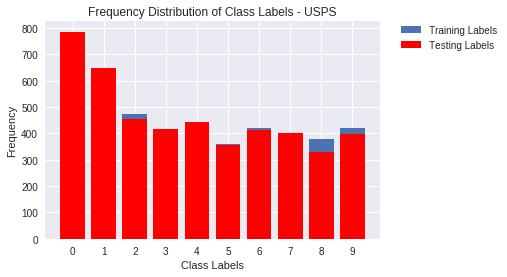

In [26]:
from collections import Counter
def get_distribution(train_labels, test_labels, dataset_name):
    #temp_labels = train_labels.reshape(73257).tolist()
    temp_labels = dict(Counter(sorted(train_labels)))
    print(temp_labels)
    plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', label='Training Labels')
    plt.xticks(range(len(temp_labels)), temp_labels.keys())
    #temp_labels = test_labels.reshape(26032).tolist()
    temp_labels = dict(Counter(sorted(test_labels)))
    print(temp_labels)
    plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', color='red', label='Testing Labels')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.legend()
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.title('Frequency Distribution of Class Labels - ' + dataset_name)
    plt.show()
    
def one_hot_decoder(a):
    return np.argmax(a)

train_set_mat = sio.loadmat('usps_dataset')

Y_train = train_set_mat['train_labels'].T
Y_test = train_set_mat['test_labels'].T

print(Y_test.shape)

test_Y = [one_hot_decoder(y) for y in Y_test]
train_Y = [one_hot_decoder(y) for y in Y_train]

print(len(train_Y), len(test_Y))
get_distribution(train_Y, test_Y, 'USPS')

In [52]:
764# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 4649 samples, validate on 4649 samples
Epoch 1/12
4649/4649 [==============================] - 4s 837us/step - loss: 1.0818 - acc: 0.6449 - val_loss: 0.3640 - val_acc: 0.8847
Epoch 2/12
4649/4649 [==============================] - 4s 904us/step - loss: 0.3811 - acc: 0.8851 - val_loss: 0.2448 - val_acc: 0.9275
Epoch 3/12
4649/4649 [==============================] - 4s 897us/step - loss: 0.2506 - acc: 0.9273 - val_loss: 0.1922 - val_acc: 0.9434
Epoch 4/12
4649/4649 [==============================] - 4s 913us/step - loss: 0.2075 - acc: 0.9389 - val_loss: 0.1421 - val_acc: 0.9546
Epoch 5/12
4649/4649 [==============================] - 4s 912us/step - loss: 0.1706 - acc: 0.9525 - val_loss: 0.1218 - val_acc: 0.9628
Epoch 6/12
3584/4649 [======================>.......] - ETA: 0s - loss: 0.1442 - acc: 0.9601

4649/4649 [==============================] - 4s 914us/step - loss: 0.1410 - acc: 0.9593 - val_loss: 0.1105 - val_acc: 0.9680
Epoch 7/12
4649/4649 [==============================] - 4s 906us/step - loss: 0.1282 - acc: 0.9636 - val_loss: 0.0939 - val_acc: 0.9707
Epoch 8/12
4649/4649 [==============================] - 4s 905us/step - loss: 0.1194 - acc: 0.9649 - val_loss: 0.0840 - val_acc: 0.9753
Epoch 9/12
4649/4649 [==============================] - 4s 903us/step - loss: 0.0956 - acc: 0.9735 - val_loss: 0.0797 - val_acc: 0.9768
Epoch 10/12
4649/4649 [==============================] - 4s 905us/step - loss: 0.1005 - acc: 0.9710 - val_loss: 0.0801 - val_acc: 0.9757
Epoch 11/12
4649/4649 [==============================] - 4s 914us/step - loss: 0.0902 - acc: 0.9738 - val_loss: 0.0829 - val_acc: 0.9742
Epoch 12/12
1152/4649 [======>.......................] - ETA: 2s - loss: 0.0702 - acc: 0.9800

4649/4649 [==============================] - 4s 889us/step - loss: 0.0773 - acc: 0.9770 - val_loss: 0.0799 - val_acc: 0.9778
Test loss: 0.07992521097859943
Test accuracy: 0.9778446977844698


In [53]:
# evaluate model with sklearn
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)

print('\n')
print(classification_report(Y_test, predicted_classes,target_names=
                            target_names,digits = 3))

4649/4649 [==============================] - 1s 123us/step


             precision    recall  f1-score   support

    class 0      0.995     0.989     0.992       786
    class 1      0.988     0.992     0.990       647
    class 2      0.982     0.971     0.977       454
    class 3      0.978     0.964     0.971       418
    class 4      0.952     0.989     0.970       443
    class 5      0.969     0.961     0.965       355
    class 6      0.985     0.981     0.983       414
    class 7      0.973     0.980     0.976       402
    class 8      0.975     0.952     0.963       331
    class 9      0.960     0.975     0.968       399

avg / total      0.978     0.978     0.978      4649



## CNN with best parameters on USPS dataset

In [54]:
train_set_mat = sio.loadmat('usps_dataset')
X_train=[[] for i in range(4649)] 
Y_train=[[] for i in range(4649)]
X_test=[[] for i in range(4649)]
Y_test=[[] for i in range(4649)]


X_train = train_set_mat['train_patterns'].T
Y_train = train_set_mat['train_labels'].T
X_test = train_set_mat['test_patterns'].T
Y_test = train_set_mat['test_labels'].T

print('X_train shape', X_train.shape)
print('Y_train shape', Y_train.shape)
print('X_test shape', X_test.shape)
print('Y_test shape', Y_test.shape)

X_train shape (4649, 256)
Y_train shape (4649, 10)
X_test shape (4649, 256)
Y_test shape (4649, 10)


In [55]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 16, 16
Y_train = np.asarray([np.argmax(row) for row in Y_train])
Y_test = np.asarray([np.argmax(row) for row in Y_test])

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= X_train.max()
X_test /= X_train.max()

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

#model design
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with sklearn
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)

print('\n')
print(classification_report(Y_test, predicted_classes,target_names=
                            target_names,digits = 3))

Train on 4649 samples, validate on 4649 samples
Epoch 1/12
4649/4649 [==============================] - 4s 848us/step - loss: 1.0839 - acc: 0.6498 - val_loss: 0.4028 - val_acc: 0.8800
Epoch 2/12
4649/4649 [==============================] - 4s 909us/step - loss: 0.3956 - acc: 0.8813 - val_loss: 0.2047 - val_acc: 0.9381
Epoch 3/12
4649/4649 [==============================] - 4s 917us/step - loss: 0.2483 - acc: 0.9271 - val_loss: 0.1503 - val_acc: 0.9538
Epoch 4/12
4649/4649 [==============================] - 4s 915us/step - loss: 0.2086 - acc: 0.9413 - val_loss: 0.1181 - val_acc: 0.9654
Epoch 5/12
4649/4649 [==============================] - 4s 914us/step - loss: 0.1776 - acc: 0.9495 - val_loss: 0.1188 - val_acc: 0.9643
Epoch 6/12
3584/4649 [======================>.......] - ETA: 0s - loss: 0.1504 - acc: 0.9607

4649/4649 [==============================] - 4s 902us/step - loss: 0.1444 - acc: 0.9615 - val_loss: 0.0925 - val_acc: 0.9725
Epoch 7/12
4649/4649 [==============================] - 4s 904us/step - loss: 0.1346 - acc: 0.9609 - val_loss: 0.0956 - val_acc: 0.9729
Epoch 8/12
4649/4649 [==============================] - 4s 906us/step - loss: 0.1218 - acc: 0.9654 - val_loss: 0.0833 - val_acc: 0.9755
Epoch 9/12
4649/4649 [==============================] - 4s 914us/step - loss: 0.1077 - acc: 0.9677 - val_loss: 0.0928 - val_acc: 0.9718
Epoch 10/12
4649/4649 [==============================] - 4s 899us/step - loss: 0.1006 - acc: 0.9705 - val_loss: 0.0787 - val_acc: 0.9768
Epoch 11/12
4649/4649 [==============================] - 4s 911us/step - loss: 0.0846 - acc: 0.9759 - val_loss: 0.0773 - val_acc: 0.9757
Epoch 12/12
1152/4649 [======>.......................] - ETA: 2s - loss: 0.1016 - acc: 0.9688

4649/4649 [==============================] - 4s 914us/step - loss: 0.0889 - acc: 0.9738 - val_loss: 0.0779 - val_acc: 0.9778
Test loss: 0.07789832233155022
Test accuracy: 0.9778446977844698
4649/4649 [==============================] - 1s 194us/step


             precision    recall  f1-score   support

    class 0      0.997     0.986     0.992       786
    class 1      0.985     0.994     0.989       647
    class 2      0.974     0.982     0.978       454
    class 3      0.983     0.959     0.971       418
    class 4      0.969     0.980     0.974       443
    class 5      0.966     0.969     0.968       355
    class 6      0.983     0.981     0.982       414
    class 7      0.943     0.990     0.966       402
    class 8      0.967     0.964     0.965       331
    class 9      0.990     0.952     0.971       399

avg / total      0.978     0.978     0.978      4649



## CNN with EMNIST

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('emnist_matlab_zip', 'r')
zip_ref.extractall()
zip_ref.close()

emnist_letters_mat = sio.loadmat('matlab/emnist-letters.mat')
height,width = 28,28
max_=len(emnist_letters_mat['dataset'][0][0][0][0][0][0])
training_images = emnist_letters_mat['dataset'][0][0][0][0][0][0][:max_].reshape(max_, height, width, 1)
training_labels = emnist_letters_mat['dataset'][0][0][0][0][0][1][:max_]
print(training_images.shape)
print(training_labels.shape)
max_ = len(emnist_letters_mat['dataset'][0][0][1][0][0][0])
testing_images = emnist_letters_mat['dataset'][0][0][1][0][0][0][:max_].reshape(max_, height, width, 1)
testing_labels = emnist_letters_mat['dataset'][0][0][1][0][0][1][:max_]
print(testing_images.shape)
print(testing_labels.shape)
# Convert type to float32
training_images = training_images.astype('float32')
testing_images = testing_images.astype('float32')

# Normalize to prevent issues with model
training_images /= 255
testing_images /= 255
# Load char mapping
mapping = {kv[0]:kv[1:][0] for kv in emnist_letters_mat['dataset'][0][0][2]}
nb_classes = len(mapping)

input_shape = (height, width, 1)
batch_size = 128
epochs = 12
X_train = training_images
Y_train = training_labels
X_test = testing_images
Y_test = testing_labels
print(Y_train[0])
Y_train = np.asarray([row-1 for row in Y_train])
Y_test = np.asarray([row-1 for row in Y_test])
print(Y_train.max()," ",Y_train.min())
print(Y_test.max()," ",Y_test.min())
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

# Hyperparameters
pool_size = (2, 2) # size of pooling area for max pooling
kernel_size = (3, 3) # convolution kernel size

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with sklearn
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, verbose=1)
target_names = ['class a/A', 'class b/B', 'class c/C', 'class d/D', 'class e/E', 
                'class f/F', 'class g/G', 'class h/H', 'class i/I','class j/J',
                'class k/K', 'class l/L', 'class m/M', 'class n/N', 'class o/O', 
                'class p/P', 'class q/Q', 'class r/R', 'class s/S','class t/T',
                'class u/U', 'class v/V', 'class w/W', 'class x/X', 'class y/Y', 
                'class z/Z']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = np_utils.to_categorical(predicted_classes, nb_classes)

print('\n')
print(classification_report(Y_test, predicted_classes,target_names=
                            target_names,digits = 3))

(124800, 28, 28, 1)
(124800, 1)
(20800, 28, 28, 1)
(20800, 1)
[23]
25   0
25   0
Train on 124800 samples, validate on 20800 samples
Epoch 1/12
 55424/124800 [============>.................] - ETA: 2:59 - loss: 1.0928 - acc: 0.6715

124800/124800 [==============================] - 336s 3ms/step - loss: 0.7887 - acc: 0.7589 - val_loss: 0.3019 - val_acc: 0.9032
Epoch 2/12
 29696/124800 [======>.......................] - ETA: 4:05 - loss: 0.4439 - acc: 0.8606

124800/124800 [==============================] - 336s 3ms/step - loss: 0.4171 - acc: 0.8692 - val_loss: 0.2550 - val_acc: 0.9166
Epoch 3/12
 19840/124800 [===>..........................] - ETA: 4:30 - loss: 0.3569 - acc: 0.8896

124800/124800 [==============================] - 334s 3ms/step - loss: 0.3551 - acc: 0.8878 - val_loss: 0.2346 - val_acc: 0.9253
Epoch 4/12
 16000/124800 [==>...........................] - ETA: 4:39 - loss: 0.3223 - acc: 0.8991

124800/124800 [==============================] - 334s 3ms/step - loss: 0.3208 - acc: 0.8983 - val_loss: 0.2276 - val_acc: 0.9281
Epoch 5/12
 14592/124800 [==>...........................] - ETA: 4:42 - loss: 0.2996 - acc: 0.9050

124800/124800 [==============================] - 333s 3ms/step - loss: 0.2971 - acc: 0.9051 - val_loss: 0.2166 - val_acc: 0.9307
Epoch 6/12
 14080/124800 [==>...........................] - ETA: 4:43 - loss: 0.2909 - acc: 0.9057

124800/124800 [==============================] - 333s 3ms/step - loss: 0.2822 - acc: 0.9094 - val_loss: 0.2237 - val_acc: 0.9296
Epoch 7/12
 13824/124800 [==>...........................] - ETA: 4:43 - loss: 0.2677 - acc: 0.9141

124800/124800 [==============================] - 333s 3ms/step - loss: 0.2725 - acc: 0.9126 - val_loss: 0.2088 - val_acc: 0.9323
Epoch 8/12
 13696/124800 [==>...........................] - ETA: 4:45 - loss: 0.2576 - acc: 0.9176

124800/124800 [==============================] - 334s 3ms/step - loss: 0.2617 - acc: 0.9155 - val_loss: 0.2141 - val_acc: 0.9322
Epoch 9/12
 13696/124800 [==>...........................] - ETA: 4:45 - loss: 0.2423 - acc: 0.9216

124800/124800 [==============================] - 334s 3ms/step - loss: 0.2499 - acc: 0.9188 - val_loss: 0.2004 - val_acc: 0.9360
Epoch 10/12
 13696/124800 [==>...........................] - ETA: 4:44 - loss: 0.2442 - acc: 0.9222

124800/124800 [==============================] - 332s 3ms/step - loss: 0.2456 - acc: 0.9212 - val_loss: 0.2006 - val_acc: 0.9360
Epoch 11/12
 13696/124800 [==>...........................] - ETA: 4:45 - loss: 0.2259 - acc: 0.9291

124800/124800 [==============================] - 333s 3ms/step - loss: 0.2402 - acc: 0.9229 - val_loss: 0.2034 - val_acc: 0.9352
Epoch 12/12
 13696/124800 [==>...........................] - ETA: 4:44 - loss: 0.2246 - acc: 0.9278

124800/124800 [==============================] - 332s 3ms/step - loss: 0.2368 - acc: 0.9235 - val_loss: 0.1956 - val_acc: 0.9367
Test loss: 0.1956048143049702
Test accuracy: 0.9366826923076923
12672/20800 [=================>............] - ETA: 5s

20800/20800 [==============================] - 14s 687us/step


             precision    recall  f1-score   support

  class a/A      0.922     0.956     0.939       800
  class b/B      0.976     0.961     0.969       800
  class c/C      0.966     0.970     0.968       800
  class d/D      0.958     0.946     0.952       800
  class e/E      0.965     0.966     0.966       800
  class f/F      0.980     0.956     0.968       800
  class g/G      0.880     0.814     0.845       800
  class h/H      0.944     0.940     0.942       800
  class i/I      0.779     0.703     0.739       800
  class j/J      0.961     0.932     0.947       800
  class k/K      0.974     0.953     0.963       800
  class l/L      0.715     0.820     0.764       800
  class m/M      0.976     0.985     0.981       800
  class n/N      0.949     0.959     0.954       800
  class o/O      0.958     0.971     0.965       800
  class p/P      0.984     0.985     0.984       800
  class q/Q      0.856     0.863  

## CNN with best params run on EMNIST letters  

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('emnist_matlab_zip', 'r')
zip_ref.extractall()
zip_ref.close()


['matlab/emnist-balanced.mat', 'matlab/emnist-byclass.mat', 'matlab/emnist-bymerge.mat', 'matlab/emnist-digits.mat', 'matlab/emnist-letters.mat', 'matlab/emnist-mnist.mat']


In [0]:
emnist_letters_mat = sio.loadmat('matlab/emnist-letters.mat')
height,width = 28,28
max_=len(emnist_letters_mat['dataset'][0][0][0][0][0][0])
training_images = emnist_letters_mat['dataset'][0][0][0][0][0][0][:max_].reshape(max_, height, width, 1)
training_labels = emnist_letters_mat['dataset'][0][0][0][0][0][1][:max_]
print(training_images.shape)
print(training_labels.shape)
max_ = len(emnist_letters_mat['dataset'][0][0][1][0][0][0])
testing_images = emnist_letters_mat['dataset'][0][0][1][0][0][0][:max_].reshape(max_, height, width, 1)
testing_labels = emnist_letters_mat['dataset'][0][0][1][0][0][1][:max_]
print(testing_images.shape)
print(testing_labels.shape)
# Convert type to float32
training_images = training_images.astype('float32')
testing_images = testing_images.astype('float32')

# Normalize to prevent issues with model
training_images /= 255
testing_images /= 255
# Load char mapping
mapping = {kv[0]:kv[1:][0] for kv in emnist_letters_mat['dataset'][0][0][2]}
nb_classes = len(mapping)

(124800, 28, 28, 1)
(124800, 1)
(20800, 28, 28, 1)
(20800, 1)


In [0]:
input_shape = (height, width, 1)
batch_size = 128
epochs = 12
X_train = training_images
Y_train = training_labels
X_test = testing_images
Y_test = testing_labels

Y_train = np.asarray([row-1 for row in Y_train])
Y_test = np.asarray([row-1 for row in Y_test])
print(Y_train.max()," ",Y_train.min())
print(Y_test.max()," ",Y_test.min())
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)


25   0
25   0


In [0]:

# Hyperparameters
pool_size = (2, 2) # size of pooling area for max pooling
kernel_size = (3, 3) # convolution kernel size

#model design
model = Sequential()
model.add(Conv2D(32, kernel_size=kernel_size,
                 padding='valid',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 124800 samples, validate on 20800 samples
Epoch 1/12
124800/124800 [==============================] - 29s 231us/step - loss: 0.7924 - acc: 0.7584 - val_loss: 0.3005 - val_acc: 0.9043
Epoch 2/12
 24448/124800 [====>.........................] - ETA: 21s - loss: 0.4427 - acc: 0.8590

124800/124800 [==============================] - 28s 222us/step - loss: 0.4178 - acc: 0.8693 - val_loss: 0.2575 - val_acc: 0.9171
Epoch 3/12
 74624/124800 [================>.............] - ETA: 10s - loss: 0.3545 - acc: 0.8868

124800/124800 [==============================] - 28s 222us/step - loss: 0.3520 - acc: 0.8880 - val_loss: 0.2443 - val_acc: 0.9235
Epoch 4/12
 93696/124800 [=====================>........] - ETA: 6s - loss: 0.3171 - acc: 0.8998

124800/124800 [==============================] - 28s 222us/step - loss: 0.3157 - acc: 0.9000 - val_loss: 0.2329 - val_acc: 0.9258
Epoch 5/12
100992/124800 [=======================>......] - ETA: 5s - loss: 0.2946 - acc: 0.9057

124800/124800 [==============================] - 28s 225us/step - loss: 0.2943 - acc: 0.9060 - val_loss: 0.2166 - val_acc: 0.9298
Epoch 6/12
103552/124800 [=======================>......] - ETA: 4s - loss: 0.2773 - acc: 0.9111

124800/124800 [==============================] - 28s 224us/step - loss: 0.2750 - acc: 0.9116 - val_loss: 0.2182 - val_acc: 0.9333
Epoch 7/12
104704/124800 [========================>.....] - ETA: 4s - loss: 0.2633 - acc: 0.9157

124800/124800 [==============================] - 28s 222us/step - loss: 0.2640 - acc: 0.9156 - val_loss: 0.2084 - val_acc: 0.9328
Epoch 8/12
105088/124800 [========================>.....] - ETA: 4s - loss: 0.2551 - acc: 0.9193

124800/124800 [==============================] - 28s 221us/step - loss: 0.2555 - acc: 0.9193 - val_loss: 0.2080 - val_acc: 0.9324
Epoch 9/12
105088/124800 [========================>.....] - ETA: 4s - loss: 0.2474 - acc: 0.9207

124800/124800 [==============================] - 28s 224us/step - loss: 0.2474 - acc: 0.9202 - val_loss: 0.1961 - val_acc: 0.9360
Epoch 10/12
104576/124800 [========================>.....] - ETA: 4s - loss: 0.2398 - acc: 0.9238

124800/124800 [==============================] - 28s 224us/step - loss: 0.2411 - acc: 0.9235 - val_loss: 0.2026 - val_acc: 0.9365
Epoch 11/12
104576/124800 [========================>.....] - ETA: 4s - loss: 0.2365 - acc: 0.9240

124800/124800 [==============================] - 28s 223us/step - loss: 0.2370 - acc: 0.9235 - val_loss: 0.1956 - val_acc: 0.9372
Epoch 12/12
104576/124800 [========================>.....] - ETA: 4s - loss: 0.2323 - acc: 0.9254

124800/124800 [==============================] - 28s 223us/step - loss: 0.2324 - acc: 0.9253 - val_loss: 0.2004 - val_acc: 0.9361
Test loss: 0.20043141062716202
Test accuracy: 0.9360576923076923


In [0]:
# evaluate model with sklearn
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, verbose=1)
target_names = ['class a/A', 'class b/B', 'class c/C', 'class d/D', 'class e/E', 
                'class f/F', 'class g/G', 'class h/H', 'class i/I','class j/J',
                'class k/K', 'class l/L', 'class m/M', 'class n/N', 'class o/O', 
                'class p/P', 'class q/Q', 'class r/R', 'class s/S','class t/T',
                'class u/U', 'class v/V', 'class w/W', 'class x/X', 'class y/Y', 
                'class z/Z']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = np_utils.to_categorical(predicted_classes, nb_classes)

print('\n')
print(classification_report(Y_test, predicted_classes,target_names=
                            target_names,digits = 3))

20800/20800 [==============================] - 1s 63us/step


             precision    recall  f1-score   support

  class a/A      0.911     0.954     0.932       800
  class b/B      0.966     0.964     0.965       800
  class c/C      0.967     0.979     0.973       800
  class d/D      0.958     0.941     0.950       800
  class e/E      0.975     0.970     0.972       800
  class f/F      0.992     0.946     0.969       800
  class g/G      0.885     0.787     0.833       800
  class h/H      0.937     0.945     0.941       800
  class i/I      0.752     0.739     0.745       800
  class j/J      0.943     0.949     0.946       800
  class k/K      0.962     0.955     0.959       800
  class l/L      0.738     0.780     0.758       800
  class m/M      0.975     0.990     0.983       800
  class n/N      0.950     0.958     0.954       800
  class o/O      0.951     0.980     0.966       800
  class p/P      0.987     0.981     0.984       800
  class q/Q      0.847     0.869    

# MLP Implementation

## MLP on SVHN 
### This is Keras implementation of MLP which does not work well with SVHN. Acc  37%

In [62]:
train_set_mat = sio.loadmat('svhn_train_mat_set')
test_set_mat = sio.loadmat('svhn_test_mat_set')
#load data
X_train=[[] for i in range(73257)] 
Y_train=[[] for i in range(73257)]
X_test=[[] for i in range(26032)]
Y_test=[[] for i in range(26032)]

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  
for image_index in range(73257):
  for i in range(32):
    for j in range(32):
      X_train[image_index].append(rgb2gray(train_set_mat['X'][:,:,:,image_index][i][j]))
      Y_train[image_index]=train_set_mat['y'][image_index][0]



for image_index in range(26032):
  for i in range(32):
    for j in range(32):
      X_test[image_index].append(rgb2gray(test_set_mat['X'][:,:,:,image_index][i][j]))
      Y_test[image_index]=test_set_mat['y'][image_index][0]
      
      
# convert list to numpy array
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)


#normalize the datasets
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= X_train.max()
X_test /= X_test.max()



# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

print(X_train.shape, 'train samples shape')
print(X_test.shape, 'test samples shape')
Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)
print(Y_train.shape, 'train labels shape')
print(Y_test.shape, 'test labels shape')





(73257, 1024) train samples shape
(26032, 1024) test samples shape
(73257, 1) train labels shape
(26032, 1) test labels shape


In [63]:
batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 32, 32


for index,row in enumerate(Y_train):
  if row == 10.0:
    Y_train[index] = 0.0
for index,row in enumerate(Y_test):
  if row == 10.0:
    Y_test[index] = 0.0


# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=1024))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          epochs=epochs,
          batch_size=batch_size)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, 
                                            verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)
print('\n')
print(classification_report(Y_test, predicted_classes,target_names=target_names,
                            digits = 3))

Epoch 1/20
73257/73257 [==============================] - 2s 33us/step - loss: 2.2413 - acc: 0.1865
Epoch 2/20
73257/73257 [==============================] - 2s 34us/step - loss: 2.1973 - acc: 0.1951
Epoch 3/20
73257/73257 [==============================] - 2s 33us/step - loss: 2.1417 - acc: 0.2165
Epoch 4/20
73257/73257 [==============================] - 3s 34us/step - loss: 2.0942 - acc: 0.2437
Epoch 5/20
73257/73257 [==============================] - 2s 34us/step - loss: 2.0638 - acc: 0.2587
Epoch 6/20
70528/73257 [===========================>..] - ETA: 0s - loss: 2.0436 - acc: 0.2663

73257/73257 [==============================] - 2s 33us/step - loss: 2.0431 - acc: 0.2663
Epoch 7/20
73257/73257 [==============================] - 2s 34us/step - loss: 2.0343 - acc: 0.2704
Epoch 8/20
73257/73257 [==============================] - 2s 33us/step - loss: 2.0181 - acc: 0.2779
Epoch 9/20
73257/73257 [==============================] - 2s 33us/step - loss: 2.0044 - acc: 0.2839
Epoch 10/20
73257/73257 [==============================] - 2s 33us/step - loss: 1.9927 - acc: 0.2898
Epoch 11/20
73257/73257 [==============================] - 2s 33us/step - loss: 1.9791 - acc: 0.2936
Epoch 12/20
15744/73257 [=====>........................] - ETA: 1s - loss: 1.9713 - acc: 0.2969

73257/73257 [==============================] - 2s 33us/step - loss: 1.9634 - acc: 0.2980
Epoch 13/20
73257/73257 [==============================] - 2s 33us/step - loss: 1.9437 - acc: 0.2993
Epoch 14/20
73257/73257 [==============================] - 2s 33us/step - loss: 1.9374 - acc: 0.2999
Epoch 15/20
73257/73257 [==============================] - 2s 33us/step - loss: 1.9262 - acc: 0.3027
Epoch 16/20
73257/73257 [==============================] - 2s 33us/step - loss: 1.9168 - acc: 0.3051
Epoch 17/20
73257/73257 [==============================] - 2s 33us/step - loss: 1.9127 - acc: 0.3059
Epoch 18/20
 6400/73257 [=>............................] - ETA: 2s - loss: 1.8833 - acc: 0.3152

73257/73257 [==============================] - 2s 33us/step - loss: 1.9040 - acc: 0.3064
Epoch 19/20
73257/73257 [==============================] - 2s 33us/step - loss: 1.8893 - acc: 0.3092
Epoch 20/20
26032/26032 [==============================] - 0s 17us/step
Test loss: 1.7713356082543465
Test accuracy: 0.3718500307314075
26032/26032 [==============================] - 0s 13us/step


             precision    recall  f1-score   support

    class 0      0.334     0.061     0.104      1744
    class 1      0.324     0.920     0.479      5099
    class 2      0.621     0.461     0.529      4149
    class 3      0.451     0.221     0.297      2882
    class 4      0.484     0.329     0.392      2523
    class 5      0.234     0.339     0.277      2384
    class 6      0.349     0.194     0.250      1977
    class 7      0.760     0.125     0.215      2019
    class 8      0.452     0.034     0.064      1660
    class 9      1.000     0.001     0.001      1595

avg / total      0.479     

## Modified Keras MLP with MNIST

In [16]:

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



60000 train samples
10000 test samples


In [17]:
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


# input image dimensions
img_rows, img_cols = 28, 28


model = Sequential()
# Dense(1024) is a fully-connected layer with 1024 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 784-dimensional vectors.
model.add(Dense(1024, activation='relu', input_dim=784))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          epochs=epochs,
          batch_size=batch_size)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, 
                                            verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)
print('\n')
print(classification_report(Y_test, predicted_classes,target_names=target_names,
                            digits = 3))

Epoch 1/20
60000/60000 [==============================] - 22s 375us/step - loss: 0.5344 - acc: 0.8367
Epoch 2/20
55936/60000 [==========================>...] - ETA: 1s - loss: 0.2520 - acc: 0.9253

60000/60000 [==============================] - 24s 402us/step - loss: 0.2497 - acc: 0.9260
Epoch 3/20
60000/60000 [==============================] - 24s 398us/step - loss: 0.1896 - acc: 0.9435
Epoch 4/20
16768/60000 [=======>......................] - ETA: 17s - loss: 0.1655 - acc: 0.9499

60000/60000 [==============================] - 24s 405us/step - loss: 0.1570 - acc: 0.9528
Epoch 5/20
60000/60000 [==============================] - 24s 397us/step - loss: 0.1339 - acc: 0.9604
Epoch 6/20
 5504/60000 [=>............................] - ETA: 22s - loss: 0.1122 - acc: 0.9660

60000/60000 [==============================] - 24s 393us/step - loss: 0.1168 - acc: 0.9658
Epoch 7/20
60000/60000 [==============================] - 24s 393us/step - loss: 0.1045 - acc: 0.9683
Epoch 8/20
 3456/60000 [>.............................] - ETA: 23s - loss: 0.0978 - acc: 0.9711

60000/60000 [==============================] - 24s 396us/step - loss: 0.0962 - acc: 0.9711
Epoch 9/20
60000/60000 [==============================] - 23s 391us/step - loss: 0.0862 - acc: 0.9735
Epoch 10/20
 5760/60000 [=>............................] - ETA: 19s - loss: 0.0807 - acc: 0.9736

60000/60000 [==============================] - 22s 373us/step - loss: 0.0787 - acc: 0.9759
Epoch 11/20
60000/60000 [==============================] - 23s 377us/step - loss: 0.0725 - acc: 0.9779
Epoch 12/20
11392/60000 [====>.........................] - ETA: 19s - loss: 0.0694 - acc: 0.9794

60000/60000 [==============================] - 22s 374us/step - loss: 0.0692 - acc: 0.9789
Epoch 13/20
60000/60000 [==============================] - 22s 372us/step - loss: 0.0647 - acc: 0.9806
Epoch 14/20
16768/60000 [=======>......................] - ETA: 16s - loss: 0.0612 - acc: 0.9815

60000/60000 [==============================] - 23s 384us/step - loss: 0.0612 - acc: 0.9810
Epoch 15/20
60000/60000 [==============================] - 23s 380us/step - loss: 0.0556 - acc: 0.9827
Epoch 16/20
14976/60000 [======>.......................] - ETA: 16s - loss: 0.0518 - acc: 0.9832

60000/60000 [==============================] - 22s 372us/step - loss: 0.0530 - acc: 0.9830
Epoch 17/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.0480 - acc: 0.9851
Epoch 18/20
16512/60000 [=======>......................] - ETA: 16s - loss: 0.0459 - acc: 0.9869

60000/60000 [==============================] - 22s 369us/step - loss: 0.0458 - acc: 0.9855
Epoch 19/20
60000/60000 [==============================] - 22s 367us/step - loss: 0.0447 - acc: 0.9861
Epoch 20/20
18432/60000 [========>.....................] - ETA: 15s - loss: 0.0429 - acc: 0.9862

10000/10000 [==============================] - 1s 106us/step
Test loss: 0.05402968371436
Test accuracy: 0.9833
10000/10000 [==============================] - 1s 104us/step


             precision    recall  f1-score   support

    class 0      0.982     0.990     0.986       980
    class 1      0.989     0.993     0.991      1135
    class 2      0.984     0.979     0.982      1032
    class 3      0.980     0.986     0.983      1010
    class 4      0.976     0.984     0.980       982
    class 5      0.990     0.981     0.985       892
    class 6      0.982     0.983     0.983       958
    class 7      0.981     0.983     0.982      1028
    class 8      0.986     0.978     0.982       974
    class 9      0.984     0.974     0.979      1009

avg / total      0.983     0.983     0.983     10000



## Modified Keras MLP with Semeion

In [0]:
def one_hot_decoder(a):
  return np.argmax(a)


In [19]:
train_class = []
train_features=[]
with open('semeion_data_set', 'rt') as file:
  dataset = file.readlines()
  

for row in dataset:
  data = row.split()
  X = np.array(data[:256]).astype(np.float).tolist()
  y = np.array(data[256:]).astype(np.int).tolist()
  y = one_hot_decoder(y)
  train_features.append(X)
  train_class.append(y)


x_train, x_test, y_train, y_test = train_test_split(np.asarray(train_features),
                                                    np.asarray(train_class))
print(x_train.shape," ",x_test.shape," ",y_train.shape," ",y_test.shape)

(1194, 256)   (399, 256)   (1194,)   (399,)


In [20]:
batch_size = 128
num_classes = 10
epochs = 20


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= x_train.max()
x_test /= x_test.max()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

1194 train samples
399 test samples


In [21]:



model = Sequential()
# Dense(1024) is a fully-connected layer with 1024 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(1024, activation='relu', input_dim=256))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=epochs,
          batch_size=batch_size)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions_last_epoch = model.predict(x_test, batch_size=batch_size, 
                                            verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)
print('\n')
print(classification_report(y_test, predicted_classes,target_names=target_names,
                            digits = 3))

Epoch 1/20
1194/1194 [==============================] - 1s 452us/step - loss: 2.3106 - acc: 0.1332
Epoch 2/20
1194/1194 [==============================] - 0s 239us/step - loss: 1.8996 - acc: 0.3987
Epoch 3/20
1194/1194 [==============================] - 0s 244us/step - loss: 1.4491 - acc: 0.6223
Epoch 4/20
1194/1194 [==============================] - 0s 239us/step - loss: 1.0597 - acc: 0.7178
Epoch 5/20
1194/1194 [==============================] - 0s 236us/step - loss: 0.8201 - acc: 0.7680
Epoch 6/20
1194/1194 [==============================] - 0s 247us/step - loss: 0.6825 - acc: 0.7990
Epoch 7/20
1194/1194 [==============================] - 0s 249us/step - loss: 0.5595 - acc: 0.8308
Epoch 8/20
1194/1194 [==============================] - 0s 330us/step - loss: 0.4818 - acc: 0.8585
Epoch 9/20
1194/1194 [==============================] - 0s 323us/step - loss: 0.4232 - acc: 0.8668
Epoch 10/20
1194/1194 [==============================] - 0s 331us/step - loss: 0.3884 - acc: 0.8836
Epoch 11/

1194/1194 [==============================] - 0s 313us/step - loss: 0.2495 - acc: 0.9305
Epoch 18/20
1194/1194 [==============================] - 0s 320us/step - loss: 0.2146 - acc: 0.9305
Epoch 19/20
1194/1194 [==============================] - 0s 323us/step - loss: 0.1765 - acc: 0.9464
Epoch 20/20
399/399 [==============================] - 0s 254us/step
Test loss: 0.23227036971234738
Test accuracy: 0.9197994987468672
399/399 [==============================] - 0s 237us/step


             precision    recall  f1-score   support

    class 0      0.977     1.000     0.988        42
    class 1      0.872     0.953     0.911        43
    class 2      0.932     1.000     0.965        41
    class 3      0.842     0.941     0.889        34
    class 4      0.973     0.783     0.867        46
    class 5      0.929     0.907     0.918        43
    class 6      0.932     1.000     0.965        41
    class 7      1.000     0.917     0.957        36
    class 8      0.938     0.857     0.89

## Modified Keras MLP with SVHN

In [0]:
train_set_mat = sio.loadmat('svhn_train_mat_set')
test_set_mat = sio.loadmat('svhn_test_mat_set')
#load data
X_train=[[] for i in range(73257)] 
Y_train=[[] for i in range(73257)]
X_test=[[] for i in range(26032)]
Y_test=[[] for i in range(26032)]

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  
for image_index in range(73257):
  for i in range(32):
    for j in range(32):
      X_train[image_index].append(rgb2gray(train_set_mat['X'][:,:,:,image_index][i][j]))
      Y_train[image_index]=train_set_mat['y'][image_index][0]

for image_index in range(26032):
  for i in range(32):
    for j in range(32):
      X_test[image_index].append(rgb2gray(test_set_mat['X'][:,:,:,image_index][i][j]))
      Y_test[image_index]=test_set_mat['y'][image_index][0]
      
      
# convert list to numpy array
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)


#normalize the datasets
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= X_train.max()
X_test /= X_test.max()



# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

print(X_train.shape, 'train samples shape')
print(X_test.shape, 'test samples shape')
Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)
print(Y_train.shape, 'train labels shape')
print(Y_test.shape, 'test labels shape')


(73257, 1024) train samples shape
(26032, 1024) test samples shape
(73257, 1) train labels shape
(26032, 1) test labels shape


In [0]:
batch_size = 128
num_classes = 10
epochs = 300

# input image dimensions
img_rows, img_cols = 32, 32


for index,row in enumerate(Y_train):
  if row == 10.0:
    Y_train[index] = 0.0
for index,row in enumerate(Y_test):
  if row == 10.0:
    Y_test[index] = 0.0


# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

model = Sequential()
# Dense(1024) is a fully-connected layer with 1024 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(1024, activation='relu', input_dim=1024))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          epochs=epochs,
          batch_size=batch_size)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, 
                                            verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)
print('\n')
print(classification_report(Y_test, predicted_classes,target_names=target_names,
                            digits = 3))

Epoch 1/300
73257/73257 [==============================] - 5s 71us/step - loss: 2.1612 - acc: 0.2213
Epoch 2/300
73257/73257 [==============================] - 5s 70us/step - loss: 1.7117 - acc: 0.4075
Epoch 3/300
73257/73257 [==============================] - 5s 71us/step - loss: 1.5257 - acc: 0.4810
Epoch 4/300
73257/73257 [==============================] - 5s 71us/step - loss: 1.4413 - acc: 0.5153
Epoch 5/300
 4608/73257 [>.............................] - ETA: 4s - loss: 1.4124 - acc: 0.5239

73257/73257 [==============================] - 5s 71us/step - loss: 1.3811 - acc: 0.5399
Epoch 6/300
73257/73257 [==============================] - 5s 72us/step - loss: 1.3424 - acc: 0.5551
Epoch 7/300
73257/73257 [==============================] - 5s 72us/step - loss: 1.2839 - acc: 0.5782
Epoch 8/300
73257/73257 [==============================] - 5s 71us/step - loss: 1.2188 - acc: 0.6032
Epoch 9/300
 9728/73257 [==>...........................] - ETA: 4s - loss: 1.2094 - acc: 0.6035

73257/73257 [==============================] - 5s 72us/step - loss: 1.1923 - acc: 0.6136
Epoch 10/300
73257/73257 [==============================] - 5s 71us/step - loss: 1.1563 - acc: 0.6262
Epoch 11/300
73257/73257 [==============================] - 5s 71us/step - loss: 1.1185 - acc: 0.6414
Epoch 12/300
73257/73257 [==============================] - 5s 72us/step - loss: 1.0958 - acc: 0.6456
Epoch 13/300
 9984/73257 [===>..........................] - ETA: 4s - loss: 1.0924 - acc: 0.6483

73257/73257 [==============================] - 5s 71us/step - loss: 1.0622 - acc: 0.6596
Epoch 14/300
73257/73257 [==============================] - 5s 71us/step - loss: 1.0404 - acc: 0.6660
Epoch 15/300
73257/73257 [==============================] - 5s 71us/step - loss: 1.0266 - acc: 0.6717
Epoch 16/300
73257/73257 [==============================] - 5s 70us/step - loss: 1.0166 - acc: 0.6757
Epoch 17/300
12672/73257 [====>.........................] - ETA: 4s - loss: 0.9984 - acc: 0.6836

73257/73257 [==============================] - 5s 69us/step - loss: 0.9939 - acc: 0.6830
Epoch 18/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.9728 - acc: 0.6871
Epoch 19/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.9613 - acc: 0.6917
Epoch 20/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.9461 - acc: 0.6968
Epoch 21/300
11264/73257 [===>..........................] - ETA: 4s - loss: 0.9609 - acc: 0.6965

73257/73257 [==============================] - 5s 70us/step - loss: 0.9371 - acc: 0.6998
Epoch 22/300
73257/73257 [==============================] - 5s 70us/step - loss: 0.9273 - acc: 0.7056
Epoch 23/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.9126 - acc: 0.7082
Epoch 24/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.9023 - acc: 0.7130
Epoch 25/300
10752/73257 [===>..........................] - ETA: 4s - loss: 0.8870 - acc: 0.7201

73257/73257 [==============================] - 5s 71us/step - loss: 0.8903 - acc: 0.7166
Epoch 26/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.8880 - acc: 0.7171
Epoch 27/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.8772 - acc: 0.7190
Epoch 28/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.8601 - acc: 0.7274
Epoch 29/300
 9728/73257 [==>...........................] - ETA: 4s - loss: 0.8597 - acc: 0.7326

73257/73257 [==============================] - 5s 73us/step - loss: 0.8530 - acc: 0.7308
Epoch 30/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.8461 - acc: 0.7319
Epoch 31/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.8376 - acc: 0.7334
Epoch 32/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.8395 - acc: 0.7320
Epoch 33/300
 8192/73257 [==>...........................] - ETA: 4s - loss: 0.8371 - acc: 0.7373

73257/73257 [==============================] - 5s 71us/step - loss: 0.8300 - acc: 0.7378
Epoch 34/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.8224 - acc: 0.7380
Epoch 35/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.8182 - acc: 0.7406
Epoch 36/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.8091 - acc: 0.7422
Epoch 37/300
11136/73257 [===>..........................] - ETA: 4s - loss: 0.8098 - acc: 0.7395

73257/73257 [==============================] - 5s 72us/step - loss: 0.8084 - acc: 0.7433
Epoch 38/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7960 - acc: 0.7486
Epoch 39/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.7889 - acc: 0.7488
Epoch 40/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7856 - acc: 0.7495
Epoch 41/300
11264/73257 [===>..........................] - ETA: 4s - loss: 0.7826 - acc: 0.7511

73257/73257 [==============================] - 5s 71us/step - loss: 0.7765 - acc: 0.7530
Epoch 42/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7839 - acc: 0.7505
Epoch 43/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7682 - acc: 0.7586
Epoch 44/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7654 - acc: 0.7566
Epoch 45/300
10496/73257 [===>..........................] - ETA: 4s - loss: 0.7737 - acc: 0.7559

73257/73257 [==============================] - 5s 72us/step - loss: 0.7609 - acc: 0.7596
Epoch 46/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7588 - acc: 0.7599
Epoch 47/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7539 - acc: 0.7624
Epoch 48/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7479 - acc: 0.7634
Epoch 49/300
11648/73257 [===>..........................] - ETA: 4s - loss: 0.7494 - acc: 0.7618

73257/73257 [==============================] - 5s 71us/step - loss: 0.7471 - acc: 0.7638
Epoch 50/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.7371 - acc: 0.7669
Epoch 51/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.7357 - acc: 0.7665
Epoch 52/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.7347 - acc: 0.7666
Epoch 53/300
 9088/73257 [==>...........................] - ETA: 4s - loss: 0.7440 - acc: 0.7608

73257/73257 [==============================] - 5s 71us/step - loss: 0.7267 - acc: 0.7697
Epoch 54/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7280 - acc: 0.7703
Epoch 55/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7252 - acc: 0.7702
Epoch 56/300
73257/73257 [==============================] - 5s 70us/step - loss: 0.7224 - acc: 0.7714
Epoch 57/300
12160/73257 [===>..........................] - ETA: 4s - loss: 0.7197 - acc: 0.7713

73257/73257 [==============================] - 5s 71us/step - loss: 0.7183 - acc: 0.7716
Epoch 58/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.7098 - acc: 0.7747
Epoch 59/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7054 - acc: 0.7765
Epoch 60/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.7074 - acc: 0.7763
Epoch 61/300
10624/73257 [===>..........................] - ETA: 4s - loss: 0.6795 - acc: 0.7834

73257/73257 [==============================] - 5s 71us/step - loss: 0.7004 - acc: 0.7781
Epoch 62/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.7067 - acc: 0.7765
Epoch 63/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6971 - acc: 0.7792
Epoch 64/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6973 - acc: 0.7802
Epoch 65/300
11520/73257 [===>..........................] - ETA: 4s - loss: 0.6821 - acc: 0.7855

73257/73257 [==============================] - 5s 72us/step - loss: 0.6867 - acc: 0.7835
Epoch 66/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6876 - acc: 0.7810
Epoch 67/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6847 - acc: 0.7828
Epoch 68/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6846 - acc: 0.7851
Epoch 69/300
 9984/73257 [===>..........................] - ETA: 4s - loss: 0.6826 - acc: 0.7860

73257/73257 [==============================] - 5s 72us/step - loss: 0.6789 - acc: 0.7847
Epoch 70/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6767 - acc: 0.7856
Epoch 71/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6710 - acc: 0.7886
Epoch 72/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6726 - acc: 0.7865
Epoch 73/300
10880/73257 [===>..........................] - ETA: 4s - loss: 0.6847 - acc: 0.7861

73257/73257 [==============================] - 5s 72us/step - loss: 0.6767 - acc: 0.7866
Epoch 74/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6702 - acc: 0.7884
Epoch 75/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6679 - acc: 0.7883
Epoch 76/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6670 - acc: 0.7904
Epoch 77/300
10752/73257 [===>..........................] - ETA: 4s - loss: 0.6493 - acc: 0.7952

73257/73257 [==============================] - 5s 71us/step - loss: 0.6588 - acc: 0.7911
Epoch 78/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6582 - acc: 0.7919
Epoch 79/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6641 - acc: 0.7904
Epoch 80/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6550 - acc: 0.7926
Epoch 81/300
11008/73257 [===>..........................] - ETA: 4s - loss: 0.6631 - acc: 0.7877

73257/73257 [==============================] - 5s 72us/step - loss: 0.6542 - acc: 0.7917
Epoch 82/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6492 - acc: 0.7940
Epoch 83/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6482 - acc: 0.7957
Epoch 84/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6434 - acc: 0.7969
Epoch 85/300
10624/73257 [===>..........................] - ETA: 4s - loss: 0.6380 - acc: 0.7973

73257/73257 [==============================] - 5s 71us/step - loss: 0.6494 - acc: 0.7958
Epoch 86/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6425 - acc: 0.7971
Epoch 87/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6378 - acc: 0.7982
Epoch 88/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6460 - acc: 0.7952
Epoch 89/300
 8960/73257 [==>...........................] - ETA: 4s - loss: 0.6372 - acc: 0.7977

73257/73257 [==============================] - 5s 72us/step - loss: 0.6382 - acc: 0.7998
Epoch 90/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6421 - acc: 0.7968
Epoch 91/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.6361 - acc: 0.7973
Epoch 92/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6293 - acc: 0.8008
Epoch 93/300
 8320/73257 [==>...........................] - ETA: 4s - loss: 0.6184 - acc: 0.7989

73257/73257 [==============================] - 5s 72us/step - loss: 0.6258 - acc: 0.8009
Epoch 94/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6249 - acc: 0.8018
Epoch 95/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6251 - acc: 0.8011
Epoch 96/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6253 - acc: 0.8029
Epoch 97/300
 7680/73257 [==>...........................] - ETA: 4s - loss: 0.6229 - acc: 0.8066

73257/73257 [==============================] - 5s 72us/step - loss: 0.6240 - acc: 0.8016
Epoch 98/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.6272 - acc: 0.8017
Epoch 99/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6215 - acc: 0.8035
Epoch 100/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6174 - acc: 0.8048
Epoch 101/300
 8960/73257 [==>...........................] - ETA: 4s - loss: 0.6261 - acc: 0.8001

73257/73257 [==============================] - 5s 72us/step - loss: 0.6158 - acc: 0.8041
Epoch 102/300
73257/73257 [==============================] - 5s 70us/step - loss: 0.6194 - acc: 0.8040
Epoch 103/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6137 - acc: 0.8074
Epoch 104/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6071 - acc: 0.8078
Epoch 105/300
 9216/73257 [==>...........................] - ETA: 4s - loss: 0.5977 - acc: 0.8126

73257/73257 [==============================] - 5s 71us/step - loss: 0.6111 - acc: 0.8066
Epoch 106/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.6078 - acc: 0.8091
Epoch 107/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6098 - acc: 0.8064
Epoch 108/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6089 - acc: 0.8080
Epoch 109/300
 7424/73257 [==>...........................] - ETA: 4s - loss: 0.6132 - acc: 0.8025

73257/73257 [==============================] - 5s 72us/step - loss: 0.6049 - acc: 0.8079
Epoch 110/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6023 - acc: 0.8090
Epoch 111/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6042 - acc: 0.8103
Epoch 112/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.6000 - acc: 0.8096
Epoch 113/300
 7680/73257 [==>...........................] - ETA: 4s - loss: 0.5930 - acc: 0.8086

73257/73257 [==============================] - 5s 72us/step - loss: 0.5943 - acc: 0.8113
Epoch 114/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.6003 - acc: 0.8098
Epoch 115/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5976 - acc: 0.8124
Epoch 116/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.5975 - acc: 0.8098
Epoch 117/300
 8960/73257 [==>...........................] - ETA: 4s - loss: 0.6065 - acc: 0.8084

73257/73257 [==============================] - 5s 73us/step - loss: 0.5934 - acc: 0.8113
Epoch 118/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.5951 - acc: 0.8114
Epoch 119/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5888 - acc: 0.8137
Epoch 120/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5855 - acc: 0.8135
Epoch 121/300
 7552/73257 [==>...........................] - ETA: 4s - loss: 0.5849 - acc: 0.8128

73257/73257 [==============================] - 5s 71us/step - loss: 0.5853 - acc: 0.8146
Epoch 122/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.5801 - acc: 0.8160
Epoch 123/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5840 - acc: 0.8157
Epoch 124/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5835 - acc: 0.8153
Epoch 125/300
 8064/73257 [==>...........................] - ETA: 4s - loss: 0.5458 - acc: 0.8271

73257/73257 [==============================] - 5s 71us/step - loss: 0.5811 - acc: 0.8156
Epoch 126/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5851 - acc: 0.8161
Epoch 127/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5809 - acc: 0.8156
Epoch 128/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5786 - acc: 0.8163
Epoch 129/300
 9216/73257 [==>...........................] - ETA: 4s - loss: 0.5870 - acc: 0.8146

73257/73257 [==============================] - 5s 71us/step - loss: 0.5822 - acc: 0.8161
Epoch 130/300
73257/73257 [==============================] - 5s 70us/step - loss: 0.5790 - acc: 0.8172
Epoch 131/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5785 - acc: 0.8157
Epoch 132/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5736 - acc: 0.8176
Epoch 133/300
10112/73257 [===>..........................] - ETA: 4s - loss: 0.5685 - acc: 0.8160

73257/73257 [==============================] - 5s 71us/step - loss: 0.5758 - acc: 0.8161
Epoch 134/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5765 - acc: 0.8181
Epoch 135/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5681 - acc: 0.8199
Epoch 136/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5698 - acc: 0.8201
Epoch 137/300
 9344/73257 [==>...........................] - ETA: 4s - loss: 0.5585 - acc: 0.8261

73257/73257 [==============================] - 5s 72us/step - loss: 0.5679 - acc: 0.8188
Epoch 138/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5661 - acc: 0.8199
Epoch 139/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5673 - acc: 0.8203
Epoch 140/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5661 - acc: 0.8209
Epoch 141/300
 9088/73257 [==>...........................] - ETA: 4s - loss: 0.5548 - acc: 0.8261

73257/73257 [==============================] - 5s 71us/step - loss: 0.5666 - acc: 0.8200
Epoch 142/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5615 - acc: 0.8197
Epoch 143/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5636 - acc: 0.8211
Epoch 144/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5627 - acc: 0.8215
Epoch 145/300
 9088/73257 [==>...........................] - ETA: 4s - loss: 0.5512 - acc: 0.8260

73257/73257 [==============================] - 5s 72us/step - loss: 0.5573 - acc: 0.8239
Epoch 146/300
73257/73257 [==============================] - 5s 70us/step - loss: 0.5587 - acc: 0.8236
Epoch 147/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5541 - acc: 0.8237
Epoch 148/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5608 - acc: 0.8230
Epoch 149/300
 9216/73257 [==>...........................] - ETA: 4s - loss: 0.5652 - acc: 0.8239

73257/73257 [==============================] - 5s 71us/step - loss: 0.5574 - acc: 0.8241
Epoch 150/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5566 - acc: 0.8234
Epoch 151/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5518 - acc: 0.8253
Epoch 152/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5502 - acc: 0.8236
Epoch 153/300
 9344/73257 [==>...........................] - ETA: 4s - loss: 0.5459 - acc: 0.8229

73257/73257 [==============================] - 5s 71us/step - loss: 0.5532 - acc: 0.8235
Epoch 154/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5493 - acc: 0.8265
Epoch 155/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5532 - acc: 0.8252
Epoch 156/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5478 - acc: 0.8264
Epoch 157/300
 8832/73257 [==>...........................] - ETA: 4s - loss: 0.5564 - acc: 0.8247

73257/73257 [==============================] - 5s 72us/step - loss: 0.5536 - acc: 0.8244
Epoch 158/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5449 - acc: 0.8280
Epoch 159/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5475 - acc: 0.8265
Epoch 160/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5469 - acc: 0.8258
Epoch 161/300
 9216/73257 [==>...........................] - ETA: 4s - loss: 0.5582 - acc: 0.8248

73257/73257 [==============================] - 5s 72us/step - loss: 0.5417 - acc: 0.8282
Epoch 162/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5421 - acc: 0.8281
Epoch 163/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5440 - acc: 0.8271
Epoch 164/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5443 - acc: 0.8267
Epoch 165/300
 8576/73257 [==>...........................] - ETA: 4s - loss: 0.5556 - acc: 0.8214

73257/73257 [==============================] - 5s 71us/step - loss: 0.5420 - acc: 0.8287
Epoch 166/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5453 - acc: 0.8273
Epoch 167/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5412 - acc: 0.8274
Epoch 168/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5411 - acc: 0.8279
Epoch 169/300
 8064/73257 [==>...........................] - ETA: 4s - loss: 0.5207 - acc: 0.8335

73257/73257 [==============================] - 5s 72us/step - loss: 0.5362 - acc: 0.8304
Epoch 170/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5314 - acc: 0.8319
Epoch 171/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5354 - acc: 0.8312
Epoch 172/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5334 - acc: 0.8306
Epoch 173/300
 8192/73257 [==>...........................] - ETA: 4s - loss: 0.5293 - acc: 0.8302

73257/73257 [==============================] - 5s 72us/step - loss: 0.5324 - acc: 0.8304
Epoch 174/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5309 - acc: 0.8325
Epoch 175/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5318 - acc: 0.8313
Epoch 176/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5318 - acc: 0.8310
Epoch 177/300
 9088/73257 [==>...........................] - ETA: 4s - loss: 0.5235 - acc: 0.8308

73257/73257 [==============================] - 5s 71us/step - loss: 0.5331 - acc: 0.8298
Epoch 178/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5329 - acc: 0.8310
Epoch 179/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5278 - acc: 0.8332
Epoch 180/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5256 - acc: 0.8330
Epoch 181/300
 9984/73257 [===>..........................] - ETA: 4s - loss: 0.5334 - acc: 0.8293

73257/73257 [==============================] - 5s 72us/step - loss: 0.5287 - acc: 0.8320
Epoch 182/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5255 - acc: 0.8327
Epoch 183/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5271 - acc: 0.8338
Epoch 184/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5227 - acc: 0.8345
Epoch 185/300
11392/73257 [===>..........................] - ETA: 4s - loss: 0.5340 - acc: 0.8296

73257/73257 [==============================] - 5s 72us/step - loss: 0.5237 - acc: 0.8329
Epoch 186/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5267 - acc: 0.8322
Epoch 187/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5237 - acc: 0.8323
Epoch 188/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5207 - acc: 0.8359
Epoch 189/300
10624/73257 [===>..........................] - ETA: 4s - loss: 0.5358 - acc: 0.8285

73257/73257 [==============================] - 5s 71us/step - loss: 0.5183 - acc: 0.8356
Epoch 190/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5198 - acc: 0.8349
Epoch 191/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5130 - acc: 0.8363
Epoch 192/300
73257/73257 [==============================] - 5s 70us/step - loss: 0.5157 - acc: 0.8364
Epoch 193/300
11392/73257 [===>..........................] - ETA: 4s - loss: 0.5166 - acc: 0.8363

73257/73257 [==============================] - 5s 70us/step - loss: 0.5158 - acc: 0.8361
Epoch 194/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5159 - acc: 0.8359
Epoch 195/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5151 - acc: 0.8376
Epoch 196/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5131 - acc: 0.8374
Epoch 197/300
 9984/73257 [===>..........................] - ETA: 4s - loss: 0.4793 - acc: 0.8489

73257/73257 [==============================] - 5s 70us/step - loss: 0.5104 - acc: 0.8380
Epoch 198/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5144 - acc: 0.8371
Epoch 199/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.5119 - acc: 0.8374
Epoch 200/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5121 - acc: 0.8365
Epoch 201/300
 8960/73257 [==>...........................] - ETA: 4s - loss: 0.5277 - acc: 0.8334

73257/73257 [==============================] - 5s 73us/step - loss: 0.5122 - acc: 0.8382
Epoch 202/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5092 - acc: 0.8371
Epoch 203/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5090 - acc: 0.8379
Epoch 204/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5077 - acc: 0.8391
Epoch 205/300
 8960/73257 [==>...........................] - ETA: 4s - loss: 0.5042 - acc: 0.8374

73257/73257 [==============================] - 5s 72us/step - loss: 0.5062 - acc: 0.8387
Epoch 206/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.5080 - acc: 0.8397
Epoch 207/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.5056 - acc: 0.8389
Epoch 208/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5071 - acc: 0.8377
Epoch 209/300
 8320/73257 [==>...........................] - ETA: 4s - loss: 0.4950 - acc: 0.8442

73257/73257 [==============================] - 5s 71us/step - loss: 0.5051 - acc: 0.8390
Epoch 210/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5028 - acc: 0.8396
Epoch 211/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.5048 - acc: 0.8395
Epoch 212/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.5054 - acc: 0.8396
Epoch 213/300
 6912/73257 [=>............................] - ETA: 4s - loss: 0.5059 - acc: 0.8455

73257/73257 [==============================] - 5s 72us/step - loss: 0.4955 - acc: 0.8449
Epoch 214/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5022 - acc: 0.8414
Epoch 215/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.5009 - acc: 0.8397
Epoch 216/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.5010 - acc: 0.8419
Epoch 217/300
 9600/73257 [==>...........................] - ETA: 4s - loss: 0.4915 - acc: 0.8429

73257/73257 [==============================] - 5s 71us/step - loss: 0.4946 - acc: 0.8417
Epoch 218/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4982 - acc: 0.8425
Epoch 219/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4975 - acc: 0.8415
Epoch 220/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.4950 - acc: 0.8427
Epoch 221/300
 6144/73257 [=>............................] - ETA: 4s - loss: 0.4937 - acc: 0.8421

73257/73257 [==============================] - 5s 73us/step - loss: 0.4942 - acc: 0.8417
Epoch 222/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4959 - acc: 0.8417
Epoch 223/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4963 - acc: 0.8423
Epoch 224/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.4939 - acc: 0.8435
Epoch 225/300
 6912/73257 [=>............................] - ETA: 4s - loss: 0.4747 - acc: 0.8478

73257/73257 [==============================] - 5s 72us/step - loss: 0.4874 - acc: 0.8444
Epoch 226/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4951 - acc: 0.8427
Epoch 227/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4934 - acc: 0.8428
Epoch 228/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4922 - acc: 0.8431
Epoch 229/300
 7808/73257 [==>...........................] - ETA: 4s - loss: 0.5090 - acc: 0.8358

73257/73257 [==============================] - 5s 72us/step - loss: 0.4884 - acc: 0.8451
Epoch 230/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4935 - acc: 0.8435
Epoch 231/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4903 - acc: 0.8456
Epoch 232/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4908 - acc: 0.8426
Epoch 233/300
10240/73257 [===>..........................] - ETA: 4s - loss: 0.4743 - acc: 0.8494

73257/73257 [==============================] - 5s 72us/step - loss: 0.4859 - acc: 0.8451
Epoch 234/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4877 - acc: 0.8465
Epoch 235/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4858 - acc: 0.8451
Epoch 236/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4830 - acc: 0.8458
Epoch 237/300
 8192/73257 [==>...........................] - ETA: 4s - loss: 0.4785 - acc: 0.8464

73257/73257 [==============================] - 5s 73us/step - loss: 0.4869 - acc: 0.8444
Epoch 238/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4875 - acc: 0.8446
Epoch 239/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4831 - acc: 0.8467
Epoch 240/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4831 - acc: 0.8472
Epoch 241/300
 8320/73257 [==>...........................] - ETA: 4s - loss: 0.4827 - acc: 0.8465

73257/73257 [==============================] - 5s 72us/step - loss: 0.4842 - acc: 0.8457
Epoch 242/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4812 - acc: 0.8461
Epoch 243/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4857 - acc: 0.8452
Epoch 244/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4770 - acc: 0.8474
Epoch 245/300
10752/73257 [===>..........................] - ETA: 4s - loss: 0.4882 - acc: 0.8446

73257/73257 [==============================] - 5s 71us/step - loss: 0.4757 - acc: 0.8486
Epoch 246/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4792 - acc: 0.8476
Epoch 247/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4816 - acc: 0.8458
Epoch 248/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4780 - acc: 0.8477
Epoch 249/300
 9600/73257 [==>...........................] - ETA: 4s - loss: 0.4700 - acc: 0.8450

73257/73257 [==============================] - 5s 70us/step - loss: 0.4773 - acc: 0.8488
Epoch 250/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4728 - acc: 0.8491
Epoch 251/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4770 - acc: 0.8476
Epoch 252/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4808 - acc: 0.8486
Epoch 253/300
 8192/73257 [==>...........................] - ETA: 4s - loss: 0.4686 - acc: 0.8485

73257/73257 [==============================] - 5s 72us/step - loss: 0.4769 - acc: 0.8469
Epoch 254/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4715 - acc: 0.8515
Epoch 255/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4741 - acc: 0.8493
Epoch 256/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4692 - acc: 0.8504
Epoch 257/300
 9344/73257 [==>...........................] - ETA: 4s - loss: 0.4614 - acc: 0.8536

73257/73257 [==============================] - 5s 71us/step - loss: 0.4726 - acc: 0.8490
Epoch 258/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4713 - acc: 0.8479
Epoch 259/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4699 - acc: 0.8503
Epoch 260/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4688 - acc: 0.8510
Epoch 261/300
 9088/73257 [==>...........................] - ETA: 4s - loss: 0.4484 - acc: 0.8527

73257/73257 [==============================] - 5s 71us/step - loss: 0.4684 - acc: 0.8491
Epoch 262/300
73257/73257 [==============================] - 5s 70us/step - loss: 0.4684 - acc: 0.8514
Epoch 263/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4706 - acc: 0.8495
Epoch 264/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4698 - acc: 0.8496
Epoch 265/300
 9216/73257 [==>...........................] - ETA: 4s - loss: 0.4864 - acc: 0.8438

73257/73257 [==============================] - 5s 71us/step - loss: 0.4695 - acc: 0.8494
Epoch 266/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4702 - acc: 0.8502
Epoch 267/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4679 - acc: 0.8491
Epoch 268/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4648 - acc: 0.8497
Epoch 269/300
 9856/73257 [===>..........................] - ETA: 4s - loss: 0.4614 - acc: 0.8526

73257/73257 [==============================] - 5s 71us/step - loss: 0.4698 - acc: 0.8510
Epoch 270/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4650 - acc: 0.8519
Epoch 271/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4650 - acc: 0.8521
Epoch 272/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4638 - acc: 0.8519
Epoch 273/300
 9728/73257 [==>...........................] - ETA: 4s - loss: 0.4575 - acc: 0.8514

73257/73257 [==============================] - 5s 72us/step - loss: 0.4639 - acc: 0.8522
Epoch 274/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4616 - acc: 0.8524
Epoch 275/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4646 - acc: 0.8523
Epoch 276/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4632 - acc: 0.8515
Epoch 277/300
 8192/73257 [==>...........................] - ETA: 4s - loss: 0.4609 - acc: 0.8545

73257/73257 [==============================] - 5s 72us/step - loss: 0.4623 - acc: 0.8525
Epoch 278/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.4645 - acc: 0.8508
Epoch 279/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.4612 - acc: 0.8529
Epoch 280/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4609 - acc: 0.8534
Epoch 281/300
 8192/73257 [==>...........................] - ETA: 4s - loss: 0.4586 - acc: 0.8558

73257/73257 [==============================] - 5s 72us/step - loss: 0.4622 - acc: 0.8527
Epoch 282/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4593 - acc: 0.8518
Epoch 283/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.4588 - acc: 0.8541
Epoch 284/300
73257/73257 [==============================] - 5s 70us/step - loss: 0.4594 - acc: 0.8536
Epoch 285/300
10240/73257 [===>..........................] - ETA: 4s - loss: 0.4623 - acc: 0.8490

73257/73257 [==============================] - 5s 69us/step - loss: 0.4622 - acc: 0.8541
Epoch 286/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4573 - acc: 0.8541
Epoch 287/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4588 - acc: 0.8533
Epoch 288/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4557 - acc: 0.8538
Epoch 289/300
 9216/73257 [==>...........................] - ETA: 4s - loss: 0.4630 - acc: 0.8515

73257/73257 [==============================] - 5s 71us/step - loss: 0.4572 - acc: 0.8531
Epoch 290/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4530 - acc: 0.8550
Epoch 291/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4553 - acc: 0.8553
Epoch 292/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4559 - acc: 0.8552
Epoch 293/300
10240/73257 [===>..........................] - ETA: 4s - loss: 0.4619 - acc: 0.8521

73257/73257 [==============================] - 5s 71us/step - loss: 0.4557 - acc: 0.8540
Epoch 294/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4493 - acc: 0.8561
Epoch 295/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4463 - acc: 0.8570
Epoch 296/300
73257/73257 [==============================] - 5s 71us/step - loss: 0.4561 - acc: 0.8550
Epoch 297/300
10752/73257 [===>..........................] - ETA: 4s - loss: 0.4605 - acc: 0.8532

73257/73257 [==============================] - 5s 71us/step - loss: 0.4552 - acc: 0.8541
Epoch 298/300
73257/73257 [==============================] - 5s 72us/step - loss: 0.4545 - acc: 0.8549
Epoch 299/300
73257/73257 [==============================] - 5s 73us/step - loss: 0.4509 - acc: 0.8563
Epoch 300/300
26032/26032 [==============================] - 1s 27us/step


Test loss: 0.3112693580844026
Test accuracy: 0.9298171481253842
26032/26032 [==============================] - 1s 22us/step


             precision    recall  f1-score   support

    class 0      0.959     0.924     0.941      1782
    class 1      0.925     0.959     0.942      4965
    class 2      0.952     0.953     0.952      3754
    class 3      0.877     0.940     0.907      2989
    class 4      0.944     0.953     0.949      2702
    class 5      0.941     0.883     0.911      2452
    class 6      0.969     0.863     0.913      1953
    class 7      0.971     0.916     0.943      1987
    class 8      0.853     0.916     0.884      1728
    class 9      0.924     0.918     0.921      1720

avg / total      0.931     0.930     0.930     26032



## Modified Keras MLP on USPS dataset

In [60]:
train_set_mat = sio.loadmat('usps_dataset')
X_train=[[] for i in range(4649)] 
Y_train=[[] for i in range(4649)]
X_test=[[] for i in range(4649)]
Y_test=[[] for i in range(4649)]


X_train = train_set_mat['train_patterns'].T
Y_train = train_set_mat['train_labels'].T
X_test = train_set_mat['test_patterns'].T
Y_test = train_set_mat['test_labels'].T

print('X_train shape', X_train.shape)
print('Y_train shape', Y_train.shape)
print('X_test shape', X_test.shape)
print('Y_test shape', Y_test.shape)

X_train shape (4649, 256)
Y_train shape (4649, 10)
X_test shape (4649, 256)
Y_test shape (4649, 10)


In [61]:
batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 16, 16
Y_train = np.asarray([np.argmax(row) for row in Y_train])
Y_test = np.asarray([np.argmax(row) for row in Y_test])


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= X_train.max()
X_test /= X_train.max()

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

model = Sequential()
# Dense(1024) is a fully-connected layer with 1024 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(1024, activation='relu', input_dim=256))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          epochs=epochs,
          batch_size=batch_size)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, 
                                            verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)
print('\n')
print(classification_report(Y_test, predicted_classes,target_names=target_names,
                            digits = 3))

Epoch 1/20
4649/4649 [==============================] - 1s 312us/step - loss: 1.2861 - acc: 0.5922
Epoch 2/20
4649/4649 [==============================] - 1s 278us/step - loss: 0.4642 - acc: 0.8552
Epoch 3/20
4649/4649 [==============================] - 2s 377us/step - loss: 0.3549 - acc: 0.8929
Epoch 4/20
4649/4649 [==============================] - 2s 372us/step - loss: 0.3074 - acc: 0.9101
Epoch 5/20
4649/4649 [==============================] - 2s 360us/step - loss: 0.2749 - acc: 0.9163
Epoch 6/20
4649/4649 [==============================] - 2s 335us/step - loss: 0.2542 - acc: 0.9269
Epoch 7/20
4649/4649 [==============================] - 2s 340us/step - loss: 0.2393 - acc: 0.9247
Epoch 8/20
2048/4649 [============>.................] - ETA: 0s - loss: 0.2151 - acc: 0.9331

4649/4649 [==============================] - 2s 353us/step - loss: 0.2214 - acc: 0.9344
Epoch 9/20
4649/4649 [==============================] - 2s 384us/step - loss: 0.2086 - acc: 0.9365
Epoch 10/20
4649/4649 [==============================] - 2s 381us/step - loss: 0.1872 - acc: 0.9451
Epoch 11/20
4649/4649 [==============================] - 2s 344us/step - loss: 0.1894 - acc: 0.9445
Epoch 12/20
4649/4649 [==============================] - 2s 339us/step - loss: 0.1762 - acc: 0.9486
Epoch 13/20
4649/4649 [==============================] - 2s 328us/step - loss: 0.1651 - acc: 0.9479
Epoch 14/20
4649/4649 [==============================] - 1s 311us/step - loss: 0.1602 - acc: 0.9527
Epoch 15/20
4649/4649 [==============================] - 2s 340us/step - loss: 0.1511 - acc: 0.9574
Epoch 16/20
4649/4649 [==============================] - 1s 322us/step - loss: 0.1491 - acc: 0.9593
Epoch 17/20
1792/4649 [==========>...................] - ETA: 0s - loss: 0.1486 - acc: 0.9531

4649/4649 [==============================] - 1s 316us/step - loss: 0.1446 - acc: 0.9570
Epoch 18/20
4649/4649 [==============================] - 1s 307us/step - loss: 0.1370 - acc: 0.9600
Epoch 19/20
4649/4649 [==============================] - 1s 312us/step - loss: 0.1242 - acc: 0.9649
Epoch 20/20
4649/4649 [==============================] - 0s 99us/step
Test loss: 0.13243784298401132
Test accuracy: 0.9627876964839049
4649/4649 [==============================] - 0s 92us/step


             precision    recall  f1-score   support

    class 0      0.983     0.982     0.983       786
    class 1      0.989     0.991     0.990       647
    class 2      0.964     0.954     0.959       454
    class 3      0.929     0.945     0.937       418
    class 4      0.955     0.953     0.954       443
    class 5      0.965     0.927     0.945       355
    class 6      0.953     0.976     0.964       414
    class 7      0.952     0.978     0.964       402
    class 8      0.945     0.934     0.

## MNIST HOG DATA COLLECTION

In [0]:
mnist_imgs = tarfile.open('mnist_img_tar', "r:gz")
train_image_paths = []
train_image_labels = []
test_image_paths = []
test_image_labels = []
for tarinfo in mnist_imgs:
  if len(tarinfo.name)>19 and tarinfo.name[10:17] == 'testing':
    test_image_paths.append(tarinfo.name)
    test_image_labels.append(int(tarinfo.name[18]))
  elif len(tarinfo.name)>20 and tarinfo.name[10:18] == 'training':
    train_image_paths.append(tarinfo.name)
    train_image_labels.append(int(tarinfo.name[19]))
    
mnist_imgs.extractall()
mnist_imgs.close()

## MNIST HOG FEATURE EXTRACTION

In [0]:
train_data = []
for i,path in enumerate(train_image_paths):
  #plt.imshow(path, interpolation='nearest')
  #plt.show()
  #plt.imsave(fname = 'temp.png', arr = train_set_mat['X'][:, :, :, i])

  # load the image, convert it to grayscale
  image = cv2.imread(path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.resize(gray, (28, 28))
  #plt.imshow(gray)
  #plt.show()

  # extract Histogram of Oriented Gradients
  # H, hogImage = feature.hog(gray, orientations=9, pixels_per_cell=(7, 7), cells_per_block=(4,4), visualise=True)
  H = feature.hog(gray, orientations=9, pixels_per_cell=(7, 7), cells_per_block=(4,4))

  #plt.imshow(hogImage)
  train_data.append(H)


test_data = []
for i,path in enumerate(test_image_paths):
  #plt.imshow(path, interpolation='nearest')
  #plt.show()
  #plt.imsave(fname = 'temp.png', arr = train_set_mat['X'][:, :, :, i])

  # load the image, convert it to grayscale
  image = cv2.imread(path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.resize(gray, (28, 28))

  # extract Histogram of Oriented Gradients
  # H, hogImage = feature.hog(gray, orientations=9, pixels_per_cell=(7, 7), cells_per_block=(4,4), visualise=True)
  H = feature.hog(gray, orientations=9, pixels_per_cell=(7, 7), cells_per_block=(4,4))

  #plt.imshow(hogImage)

  test_data.append(H)
  
X_train = np.asarray(train_data)
Y_train = np.asarray(train_image_labels)
X_test = np.asarray(test_data)
Y_test = np.asarray(test_image_labels)
print("X_train shape ",X_train.shape)
print("Y_train shape ",Y_train.shape)
print("X_test shape ", X_test.shape)
print("Y_test shape ",Y_test.shape)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


X_train shape  (60000, 144)
Y_train shape  (60000,)
X_test shape  (10000, 144)
Y_test shape  (10000,)


## MLP WITH HOG FEATURES on MNIST

In [0]:
batch_size = 128
num_classes = 10
epochs = 30


# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

model = Sequential()
# Dense(1024) is a fully-connected layer with 1024 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(1024, activation='relu', input_dim=144))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          epochs=epochs,
          batch_size=batch_size)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, 
                                            verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)
print('\n')
print(classification_report(Y_test, predicted_classes,target_names=target_names,
                            digits = 3))

Epoch 1/30
60000/60000 [==============================] - 4s 62us/step - loss: 2.1892 - acc: 0.3224
Epoch 2/30
60000/60000 [==============================] - 4s 60us/step - loss: 1.4665 - acc: 0.6244
Epoch 3/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.7843 - acc: 0.7752
Epoch 4/30
35968/60000 [================>.............] - ETA: 1s - loss: 0.5700 - acc: 0.8264

60000/60000 [==============================] - 4s 60us/step - loss: 0.5390 - acc: 0.8349
Epoch 5/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.4328 - acc: 0.8647
Epoch 6/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.3789 - acc: 0.8814
Epoch 7/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.3406 - acc: 0.8932
Epoch 8/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.3172 - acc: 0.9011
Epoch 9/30
 5504/60000 [=>............................] - ETA: 3s - loss: 0.3257 - acc: 0.8997

60000/60000 [==============================] - 4s 62us/step - loss: 0.2983 - acc: 0.9067
Epoch 10/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.2817 - acc: 0.9124
Epoch 11/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.2718 - acc: 0.9141
Epoch 12/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.2602 - acc: 0.9188
Epoch 13/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.2497 - acc: 0.9227


Epoch 14/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.2415 - acc: 0.9245
Epoch 15/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.2357 - acc: 0.9259
Epoch 16/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.2291 - acc: 0.9285
Epoch 17/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.2247 - acc: 0.9294
Epoch 18/30
52736/60000 [=========================>....] - ETA: 0s - loss: 0.2187 - acc: 0.9317

60000/60000 [==============================] - 4s 61us/step - loss: 0.2177 - acc: 0.9319
Epoch 19/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.2131 - acc: 0.9334
Epoch 20/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.2069 - acc: 0.9356
Epoch 21/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.2048 - acc: 0.9352
Epoch 22/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.1986 - acc: 0.9374
Epoch 23/30
 5632/60000 [=>............................] - ETA: 3s - loss: 0.1947 - acc: 0.9396

60000/60000 [==============================] - 4s 60us/step - loss: 0.1966 - acc: 0.9389
Epoch 24/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.1942 - acc: 0.9392
Epoch 25/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.1894 - acc: 0.9404
Epoch 26/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.1866 - acc: 0.9414
Epoch 27/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.1819 - acc: 0.9432
Epoch 28/30


60000/60000 [==============================] - 4s 61us/step - loss: 0.1800 - acc: 0.9440
Epoch 29/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.1771 - acc: 0.9456
Epoch 30/30
10000/10000 [==============================] - 0s 29us/step
Test loss: 0.13439953795671464
Test accuracy: 0.9561
10000/10000 [==============================] - 0s 22us/step


             precision    recall  f1-score   support

    class 0      0.971     0.985     0.978       980
    class 1      0.980     0.978     0.979      1135
    class 2      0.941     0.965     0.953      1032
    class 3      0.939     0.959     0.949      1010
    class 4      0.973     0.945     0.959       982
    class 5      0.965     0.955     0.960       892
    class 6      0.979     0.974     0.976       958
    class 7      0.936     0.951     0.944      1028
    class 8      0.923     0.938     0.931       974
    class 9      0.956     0.908     0.931      1009

avg / total      0.956     0.956     0

## SVHN HOG FEATURES EXTRACTION

In [0]:

train_set_mat = sio.loadmat('svhn_train_mat_set')
test_set_mat = sio.loadmat('svhn_test_mat_set')

train_data = []
train_image_labels = []
for i in range(train_set_mat['X'].shape[3]):
  #plt.imshow(train_set_mat['X'][:, :, :, i], interpolation='nearest')
  #plt.show()
  plt.imsave(fname = 'temp.png', arr = train_set_mat['X'][:, :, :, i])

  # load the image, convert it to grayscale
  image = cv2.imread('temp.png')
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.resize(gray, (32, 32))
  #plt.imshow(gray)
  #plt.show()
  

  # extract Histogram of Oriented Gradients from the logo
  H = feature.hog(gray, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(8,8))

  #plt.imshow(hogImage)

  # update the data and labels
  train_data.append(H)
  train_image_labels.append(train_set_mat['y'][i][0])
  
test_data = []
test_image_labels = []
for i in range(test_set_mat['X'].shape[3]):
  #plt.imshow(path, interpolation='nearest')
  #plt.show()
  plt.imsave(fname = 'temp.png', arr = test_set_mat['X'][:, :, :, i])

  # load the image, convert it to grayscale
  image = cv2.imread('temp.png')
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.resize(gray, (32, 32))

  # extract Histogram of Oriented Gradients from the logo
  H = feature.hog(gray, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(8,8))

  #plt.imshow(hogImage)

  # update the data and labels
  test_data.append(H)
  test_image_labels.append(test_set_mat['y'][i][0])
  
  
X_train = np.asarray(train_data)
Y_train = np.asarray(train_image_labels)
X_test = np.asarray(test_data)
Y_test = np.asarray(test_image_labels)
print("X_train shape ",X_train.shape)
print("Y_train shape ",Y_train.shape)
print("X_test shape ", X_test.shape)
print("Y_test shape ",Y_test.shape)
  
#pickle.dump(train_data, 'train_hog_data_svhn')
#pickle.dump(test_data, 'test_hog_data_svhn')

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


X_train shape  (73257, 576)
Y_train shape  (73257,)
X_test shape  (26032, 576)
Y_test shape  (26032,)


## MLP with HOG features on SVHN

In [0]:
batch_size = 128
num_classes = 10
epochs = 150

for index,row in enumerate(Y_train):
  if row == 10.0:
    Y_train[index] = 0.0
for index,row in enumerate(Y_test):
  if row == 10.0:
    Y_test[index] = 0.0

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

model = Sequential()
# Dense(1024) is a fully-connected layer with 1024 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(1024, activation='relu', input_dim=576))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          epochs=epochs,
          batch_size=batch_size)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, 
                                            verbose=1)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = keras.utils.to_categorical(predicted_classes, num_classes)
print('\n')
print(classification_report(Y_test, predicted_classes,target_names=target_names,
                            digits = 3))

Epoch 1/150
73257/73257 [==============================] - 5s 67us/step - loss: 2.2346 - acc: 0.1888
Epoch 2/150
73257/73257 [==============================] - 5s 65us/step - loss: 2.2196 - acc: 0.1910
Epoch 3/150
73257/73257 [==============================] - 5s 67us/step - loss: 2.1809 - acc: 0.2242
Epoch 4/150
73257/73257 [==============================] - 5s 65us/step - loss: 2.0439 - acc: 0.2964
Epoch 5/150
18560/73257 [======>.......................] - ETA: 3s - loss: 1.9339 - acc: 0.3217

73257/73257 [==============================] - 5s 67us/step - loss: 1.8826 - acc: 0.3417
Epoch 6/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.7493 - acc: 0.4023
Epoch 7/150
73257/73257 [==============================] - 5s 65us/step - loss: 1.6062 - acc: 0.4517
Epoch 8/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.5073 - acc: 0.4803
Epoch 9/150
28544/73257 [==========>...................] - ETA: 2s - loss: 1.4545 - acc: 0.4985

73257/73257 [==============================] - 5s 66us/step - loss: 1.4322 - acc: 0.5092
Epoch 10/150
73257/73257 [==============================] - 5s 65us/step - loss: 1.3503 - acc: 0.5459
Epoch 11/150
73257/73257 [==============================] - 5s 64us/step - loss: 1.2731 - acc: 0.5783
Epoch 12/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.2064 - acc: 0.6057
Epoch 13/150
29824/73257 [===========>..................] - ETA: 2s - loss: 1.1638 - acc: 0.6177

73257/73257 [==============================] - 5s 67us/step - loss: 1.1513 - acc: 0.6227
Epoch 14/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.1156 - acc: 0.6350
Epoch 15/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0875 - acc: 0.6443
Epoch 16/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0748 - acc: 0.6490
Epoch 17/150
26112/73257 [=========>....................] - ETA: 3s - loss: 1.0803 - acc: 0.6469

73257/73257 [==============================] - 5s 66us/step - loss: 1.0691 - acc: 0.6507
Epoch 18/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0745 - acc: 0.6477
Epoch 19/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0689 - acc: 0.6528
Epoch 20/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0499 - acc: 0.6576
Epoch 21/150
28032/73257 [==========>...................] - ETA: 2s - loss: 1.0559 - acc: 0.6541

73257/73257 [==============================] - 5s 66us/step - loss: 1.0596 - acc: 0.6533
Epoch 22/150
73257/73257 [==============================] - 5s 65us/step - loss: 1.0526 - acc: 0.6583
Epoch 23/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0524 - acc: 0.6556
Epoch 24/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0532 - acc: 0.6569
Epoch 25/150
30464/73257 [===========>..................] - ETA: 2s - loss: 1.0426 - acc: 0.6625

73257/73257 [==============================] - 5s 66us/step - loss: 1.0489 - acc: 0.6580
Epoch 26/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0467 - acc: 0.6608
Epoch 27/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0568 - acc: 0.6597
Epoch 28/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0457 - acc: 0.6624
Epoch 29/150
26112/73257 [=========>....................] - ETA: 3s - loss: 1.0442 - acc: 0.6642

73257/73257 [==============================] - 5s 67us/step - loss: 1.0301 - acc: 0.6653
Epoch 30/150
73257/73257 [==============================] - 5s 68us/step - loss: 1.0559 - acc: 0.6593
Epoch 31/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0623 - acc: 0.6530
Epoch 32/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0610 - acc: 0.6546
Epoch 33/150
24192/73257 [========>.....................] - ETA: 3s - loss: 1.0791 - acc: 0.6486

73257/73257 [==============================] - 5s 67us/step - loss: 1.0760 - acc: 0.6483
Epoch 34/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0859 - acc: 0.6446
Epoch 35/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1022 - acc: 0.6388
Epoch 36/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0894 - acc: 0.6426
Epoch 37/150
24576/73257 [=========>....................] - ETA: 3s - loss: 1.0950 - acc: 0.6382

73257/73257 [==============================] - 5s 66us/step - loss: 1.0934 - acc: 0.6400
Epoch 38/150
73257/73257 [==============================] - 5s 65us/step - loss: 1.0929 - acc: 0.6376
Epoch 39/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0783 - acc: 0.6441
Epoch 40/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0980 - acc: 0.6386
Epoch 41/150
27264/73257 [==========>...................] - ETA: 3s - loss: 1.1197 - acc: 0.6311

73257/73257 [==============================] - 5s 67us/step - loss: 1.1192 - acc: 0.6304
Epoch 42/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.1230 - acc: 0.6290
Epoch 43/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.1013 - acc: 0.6354
Epoch 44/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1098 - acc: 0.6348
Epoch 45/150
27136/73257 [==========>...................] - ETA: 3s - loss: 1.1351 - acc: 0.6239

73257/73257 [==============================] - 5s 66us/step - loss: 1.1401 - acc: 0.6243
Epoch 46/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1869 - acc: 0.6050
Epoch 47/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1554 - acc: 0.6153
Epoch 48/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.1307 - acc: 0.6199
Epoch 49/150
25344/73257 [=========>....................] - ETA: 3s - loss: 1.1206 - acc: 0.6237

73257/73257 [==============================] - 5s 67us/step - loss: 1.1007 - acc: 0.6314
Epoch 50/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.1050 - acc: 0.6332
Epoch 51/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1162 - acc: 0.6297
Epoch 52/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1028 - acc: 0.6326
Epoch 53/150
25344/73257 [=========>....................] - ETA: 3s - loss: 1.0766 - acc: 0.6456

73257/73257 [==============================] - 5s 67us/step - loss: 1.0796 - acc: 0.6426
Epoch 54/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0695 - acc: 0.6475
Epoch 55/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0688 - acc: 0.6470
Epoch 56/150
73257/73257 [==============================] - 5s 68us/step - loss: 1.0875 - acc: 0.6410
Epoch 57/150
24192/73257 [========>.....................] - ETA: 3s - loss: 1.1157 - acc: 0.6303

73257/73257 [==============================] - 5s 66us/step - loss: 1.1019 - acc: 0.6347
Epoch 58/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0965 - acc: 0.6378
Epoch 59/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1213 - acc: 0.6285
Epoch 60/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1080 - acc: 0.6319
Epoch 61/150
26496/73257 [=========>....................] - ETA: 3s - loss: 1.1247 - acc: 0.6235

73257/73257 [==============================] - 5s 67us/step - loss: 1.1240 - acc: 0.6261
Epoch 62/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1471 - acc: 0.6142
Epoch 63/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1289 - acc: 0.6243
Epoch 64/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.1304 - acc: 0.6221
Epoch 65/150
25472/73257 [=========>....................] - ETA: 3s - loss: 1.1550 - acc: 0.6155

73257/73257 [==============================] - 5s 67us/step - loss: 1.1743 - acc: 0.6092
Epoch 66/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.1718 - acc: 0.6090
Epoch 67/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.1510 - acc: 0.6175
Epoch 68/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1092 - acc: 0.6350
Epoch 69/150
25856/73257 [=========>....................] - ETA: 3s - loss: 1.1501 - acc: 0.6194

73257/73257 [==============================] - 5s 67us/step - loss: 1.1414 - acc: 0.6248
Epoch 70/150
73257/73257 [==============================] - 5s 68us/step - loss: 1.1133 - acc: 0.6344
Epoch 71/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.1035 - acc: 0.6377
Epoch 72/150
73257/73257 [==============================] - 5s 65us/step - loss: 1.1191 - acc: 0.6325
Epoch 73/150
28288/73257 [==========>...................] - ETA: 2s - loss: 1.1062 - acc: 0.6357

73257/73257 [==============================] - 5s 65us/step - loss: 1.0962 - acc: 0.6397
Epoch 74/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0791 - acc: 0.6481
Epoch 75/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0741 - acc: 0.6520
Epoch 76/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0734 - acc: 0.6508
Epoch 77/150
28416/73257 [==========>...................] - ETA: 2s - loss: 1.0897 - acc: 0.6388

73257/73257 [==============================] - 5s 66us/step - loss: 1.0836 - acc: 0.6441
Epoch 78/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0586 - acc: 0.6538
Epoch 79/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0245 - acc: 0.6677
Epoch 80/150
73257/73257 [==============================] - 5s 64us/step - loss: 1.0397 - acc: 0.6603
Epoch 81/150
29440/73257 [===========>..................] - ETA: 2s - loss: 1.0247 - acc: 0.6675

73257/73257 [==============================] - 5s 66us/step - loss: 1.0198 - acc: 0.6688
Epoch 82/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0289 - acc: 0.6665
Epoch 83/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0412 - acc: 0.6619
Epoch 84/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0353 - acc: 0.6617
Epoch 85/150
31360/73257 [===========>..................] - ETA: 2s - loss: 1.0280 - acc: 0.6653

73257/73257 [==============================] - 5s 64us/step - loss: 1.0398 - acc: 0.6612
Epoch 86/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0640 - acc: 0.6504
Epoch 87/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0553 - acc: 0.6542
Epoch 88/150
73257/73257 [==============================] - 5s 65us/step - loss: 1.0460 - acc: 0.6591
Epoch 89/150
29312/73257 [===========>..................] - ETA: 2s - loss: 1.0242 - acc: 0.6659

73257/73257 [==============================] - 5s 66us/step - loss: 1.0130 - acc: 0.6699
Epoch 90/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.9935 - acc: 0.6775
Epoch 91/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.9995 - acc: 0.6768
Epoch 92/150
73257/73257 [==============================] - 5s 68us/step - loss: 1.0108 - acc: 0.6712
Epoch 93/150
24320/73257 [========>.....................] - ETA: 3s - loss: 1.0325 - acc: 0.6655

73257/73257 [==============================] - 5s 68us/step - loss: 1.0245 - acc: 0.6682
Epoch 94/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0189 - acc: 0.6685
Epoch 95/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0167 - acc: 0.6692
Epoch 96/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0159 - acc: 0.6689
Epoch 97/150
26496/73257 [=========>....................] - ETA: 3s - loss: 0.9980 - acc: 0.6770

73257/73257 [==============================] - 5s 66us/step - loss: 0.9955 - acc: 0.6778
Epoch 98/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0055 - acc: 0.6707
Epoch 99/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0445 - acc: 0.6555
Epoch 100/150
73257/73257 [==============================] - 5s 66us/step - loss: 1.0118 - acc: 0.6680
Epoch 101/150
28672/73257 [==========>...................] - ETA: 2s - loss: 1.0035 - acc: 0.6705

73257/73257 [==============================] - 5s 66us/step - loss: 1.0112 - acc: 0.6686
Epoch 102/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0252 - acc: 0.6647
Epoch 103/150
73257/73257 [==============================] - 5s 67us/step - loss: 1.0191 - acc: 0.6669
Epoch 104/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.9917 - acc: 0.6757
Epoch 105/150
25600/73257 [=========>....................] - ETA: 3s - loss: 1.0018 - acc: 0.6709

73257/73257 [==============================] - 5s 67us/step - loss: 0.9996 - acc: 0.6741
Epoch 106/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.9870 - acc: 0.6785
Epoch 107/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.9847 - acc: 0.6772
Epoch 108/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.9841 - acc: 0.6799
Epoch 109/150
24320/73257 [========>.....................] - ETA: 3s - loss: 0.9909 - acc: 0.6760

73257/73257 [==============================] - 5s 67us/step - loss: 0.9734 - acc: 0.6815
Epoch 110/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.9656 - acc: 0.6862
Epoch 111/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.9814 - acc: 0.6794
Epoch 112/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.9734 - acc: 0.6824
Epoch 113/150
26368/73257 [=========>....................] - ETA: 3s - loss: 0.9722 - acc: 0.6846

73257/73257 [==============================] - 5s 65us/step - loss: 0.9681 - acc: 0.6858
Epoch 114/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.9664 - acc: 0.6870
Epoch 115/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.9591 - acc: 0.6879
Epoch 116/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.9493 - acc: 0.6923
Epoch 117/150
26240/73257 [=========>....................] - ETA: 3s - loss: 0.9732 - acc: 0.6774

73257/73257 [==============================] - 5s 68us/step - loss: 0.9764 - acc: 0.6801
Epoch 118/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.9692 - acc: 0.6832
Epoch 119/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.9643 - acc: 0.6843
Epoch 120/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.9612 - acc: 0.6860
Epoch 121/150
24192/73257 [========>.....................] - ETA: 3s - loss: 0.9687 - acc: 0.6797

73257/73257 [==============================] - 5s 67us/step - loss: 0.9577 - acc: 0.6864
Epoch 122/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.9569 - acc: 0.6870
Epoch 123/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.9495 - acc: 0.6907
Epoch 124/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.9428 - acc: 0.6930
Epoch 125/150
24832/73257 [=========>....................] - ETA: 3s - loss: 0.9365 - acc: 0.6976

73257/73257 [==============================] - 5s 67us/step - loss: 0.9367 - acc: 0.6967
Epoch 126/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.9310 - acc: 0.6971
Epoch 127/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.9355 - acc: 0.6956
Epoch 128/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.9170 - acc: 0.7063
Epoch 129/150
27008/73257 [==========>...................] - ETA: 3s - loss: 0.9107 - acc: 0.7055

73257/73257 [==============================] - 5s 67us/step - loss: 0.9004 - acc: 0.7115
Epoch 130/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.8867 - acc: 0.7164
Epoch 131/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.8826 - acc: 0.7163
Epoch 132/150
73257/73257 [==============================] - 5s 68us/step - loss: 0.8949 - acc: 0.7127
Epoch 133/150
24448/73257 [=========>....................] - ETA: 3s - loss: 0.9079 - acc: 0.7103

73257/73257 [==============================] - 5s 68us/step - loss: 0.8933 - acc: 0.7125
Epoch 134/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.8927 - acc: 0.7114
Epoch 135/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.8991 - acc: 0.7112
Epoch 136/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.8952 - acc: 0.7109
Epoch 137/150
24576/73257 [=========>....................] - ETA: 3s - loss: 0.9088 - acc: 0.7093

73257/73257 [==============================] - 5s 67us/step - loss: 0.8833 - acc: 0.7171
Epoch 138/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.8811 - acc: 0.7147
Epoch 139/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.8827 - acc: 0.7164
Epoch 140/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.8810 - acc: 0.7185
Epoch 141/150
25088/73257 [=========>....................] - ETA: 3s - loss: 0.8783 - acc: 0.7152

73257/73257 [==============================] - 5s 68us/step - loss: 0.8809 - acc: 0.7152
Epoch 142/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.8736 - acc: 0.7214
Epoch 143/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.8676 - acc: 0.7225
Epoch 144/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.8545 - acc: 0.7281
Epoch 145/150
23680/73257 [========>.....................] - ETA: 3s - loss: 0.8622 - acc: 0.7263

73257/73257 [==============================] - 5s 67us/step - loss: 0.8483 - acc: 0.7294
Epoch 146/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.8450 - acc: 0.7297
Epoch 147/150
73257/73257 [==============================] - 5s 67us/step - loss: 0.8555 - acc: 0.7254
Epoch 148/150
73257/73257 [==============================] - 5s 66us/step - loss: 0.8635 - acc: 0.7231
Epoch 149/150
25984/73257 [=========>....................] - ETA: 3s - loss: 0.8575 - acc: 0.7246

73257/73257 [==============================] - 5s 65us/step - loss: 0.8566 - acc: 0.7256
Epoch 150/150
26032/26032 [==============================] - 1s 27us/step
Test loss: 0.6685728108729039
Test accuracy: 0.8021281500059033
26032/26032 [==============================] - 1s 21us/step


             precision    recall  f1-score   support

    class 0      0.776     0.716     0.745      1744
    class 1      0.913     0.885     0.899      5099
    class 2      0.822     0.914     0.865      4149
    class 3      0.709     0.718     0.714      2882
    class 4      0.884     0.782     0.830      2523
    class 5      0.852     0.730     0.787      2384
    class 6      0.768     0.731     0.749      1977
    class 7      0.869     0.847     0.858      2019
    class 8      0.610     0.700     0.652      1660
    class 9      0.639     0.771     0.699      1595

avg / total      0.808     0.802     0.803     26032



## Modified Keras MLP with EMNIST Letters

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('emnist_matlab_zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
emnist_letters_mat = sio.loadmat('matlab/emnist-letters.mat')
height,width = 28,28
max_=len(emnist_letters_mat['dataset'][0][0][0][0][0][0])
training_images = emnist_letters_mat['dataset'][0][0][0][0][0][0][:max_].reshape(max_, height, width, 1)
training_labels = emnist_letters_mat['dataset'][0][0][0][0][0][1][:max_]
print(training_images.shape)
print(training_labels.shape)
max_ = len(emnist_letters_mat['dataset'][0][0][1][0][0][0])
testing_images = emnist_letters_mat['dataset'][0][0][1][0][0][0][:max_].reshape(max_, height, width, 1)
testing_labels = emnist_letters_mat['dataset'][0][0][1][0][0][1][:max_]
print(testing_images.shape)
print(testing_labels.shape)
# Convert type to float32
training_images = training_images.astype('float32')
testing_images = testing_images.astype('float32')

# Normalize to prevent issues with model
training_images /= 255
testing_images /= 255
# Load char mapping
mapping = {kv[0]:kv[1:][0] for kv in emnist_letters_mat['dataset'][0][0][2]}
nb_classes = len(mapping)

(124800, 28, 28, 1)
(124800, 1)
(20800, 28, 28, 1)
(20800, 1)


In [0]:

batch_size = 128
epochs = 12
X_train = training_images
Y_train = training_labels
X_test = testing_images
Y_test = testing_labels
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
Y_train = np.asarray([row-1 for row in Y_train])
Y_test = np.asarray([row-1 for row in Y_test])
print("X_train shape ",X_train.shape," X_test shape ",X_test.shape)
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)


X_train shape  (124800, 784)  X_test shape  (20800, 784)


In [0]:
model = Sequential()
# Dense(1024) is a fully-connected layer with 1024 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(1024, activation='relu', input_dim=784))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          epochs=epochs,
          batch_size=batch_size)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with sklearn
predictions_last_epoch = model.predict(X_test, batch_size=batch_size, verbose=1)
target_names = ['class a/A', 'class b/B', 'class c/C', 'class d/D', 'class e/E', 
                'class f/F', 'class g/G', 'class h/H', 'class i/I','class j/J',
                'class k/K', 'class l/L', 'class m/M', 'class n/N', 'class o/O', 
                'class p/P', 'class q/Q', 'class r/R', 'class s/S','class t/T',
                'class u/U', 'class v/V', 'class w/W', 'class x/X', 'class y/Y', 
                'class z/Z']

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
predicted_classes = np_utils.to_categorical(predicted_classes, nb_classes)

print('\n')
print(classification_report(Y_test, predicted_classes,target_names=
                            target_names,digits = 3))

Epoch 1/12
124800/124800 [==============================] - 12s 95us/step - loss: 1.2109 - acc: 0.6408
Epoch 2/12
124800/124800 [==============================] - 11s 91us/step - loss: 0.6764 - acc: 0.7946
Epoch 3/12
 81024/124800 [==================>...........] - ETA: 3s - loss: 0.5614 - acc: 0.8257

124800/124800 [==============================] - 11s 91us/step - loss: 0.5491 - acc: 0.8296
Epoch 4/12
124800/124800 [==============================] - 11s 92us/step - loss: 0.4816 - acc: 0.8505
Epoch 5/12
116736/124800 [===========================>..] - ETA: 0s - loss: 0.4396 - acc: 0.8613

124800/124800 [==============================] - 11s 92us/step - loss: 0.4377 - acc: 0.8619
Epoch 6/12
124800/124800 [==============================] - 11s 91us/step - loss: 0.4062 - acc: 0.8709
Epoch 7/12
124800/124800 [==============================] - 11s 91us/step - loss: 0.3844 - acc: 0.8773
Epoch 8/12
  2432/124800 [..............................] - ETA: 11s - loss: 0.3700 - acc: 0.8787

124800/124800 [==============================] - 11s 91us/step - loss: 0.3601 - acc: 0.8847
Epoch 9/12
124800/124800 [==============================] - 11s 90us/step - loss: 0.3439 - acc: 0.8892
Epoch 10/12
 95232/124800 [=====================>........] - ETA: 2s - loss: 0.3277 - acc: 0.8939

124800/124800 [==============================] - 11s 92us/step - loss: 0.3298 - acc: 0.8932
Epoch 11/12
124800/124800 [==============================] - 11s 92us/step - loss: 0.3165 - acc: 0.8957
Epoch 12/12
118784/124800 [===========================>..] - ETA: 0s - loss: 0.3046 - acc: 0.8997

20800/20800 [==============================] - 1s 30us/step
Test loss: 0.26361373745478117
Test accuracy: 0.915
20800/20800 [==============================] - 1s 25us/step


             precision    recall  f1-score   support

  class a/A      0.887     0.916     0.902       800
  class b/B      0.920     0.949     0.934       800
  class c/C      0.945     0.940     0.942       800
  class d/D      0.911     0.924     0.917       800
  class e/E      0.920     0.950     0.935       800
  class f/F      0.969     0.924     0.946       800
  class g/G      0.847     0.764     0.803       800
  class h/H      0.928     0.920     0.924       800
  class i/I      0.751     0.724     0.737       800
  class j/J      0.946     0.896     0.920       800
  class k/K      0.937     0.927     0.932       800
  class l/L      0.724     0.799     0.759       800
  class m/M      0.972     0.969     0.971       800
  class n/N      0.912     0.935     0.923       800
  class o/O      0.933     0.9